## 잘 팔리는 제품과 잘 팔리지 않는 제품의 이유를 알아보자

### 설정

In [1]:
import datetime # 날짜 바꾸끼
import os
import sys
import urllib.request
import json
import numpy as np
import pandas as pd
import copy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleMyungjo.ttf").get_name()
rc('font', family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False
import matplotlib.ticker as ticker


### 기본 파일 불러오기

In [2]:
# 다이어트식품 데이터 가져오기
dietfood = pd.read_csv("data/healthfood_preprocessing.csv", encoding='utf-8-sig')
# 영양제 데이터 가져오기
nutrients = pd.read_csv("data/pre_nutrients.csv", encoding='utf-8-sig')

### 데이터 정리하기

##### dietfood cate_5 만들어주기 (nutrients에만 cate_5 값이 있기 때문)

In [3]:
dietfood["cate_5"] = dietfood["cate_4"]

##### column 순서 바꿔주기
- 범주형 -> 수치형

In [4]:
nutrients = nutrients[["name", "brand", "cate_1", "cate_2", "cate_3", "cate_4", "cate_5", "tag", "price", "review", "purchaseCnt", "date"]]
dietfood = dietfood[["name", "brand", "cate_1", "cate_2", "cate_3", "cate_4", "cate_5", "tag", "price", "review", "purchaseCnt", "date"]]

##### concat 합치기
- reset index : index 초기화
- drop index column : 중복 index 컬럼 drop

In [5]:
df_concat = pd.concat([nutrients, dietfood])
df_concat.reset_index()
df_concat[["name", "brand", "cate_1", "cate_2", "cate_3", "cate_4", "cate_5", "tag", "price", "review", "purchaseCnt", "date"]]

,name,brand,cate_1,cate_2,cate_3,cate_4,cate_5,tag,price,review,purchaseCnt,date
0,SMDR 데이엔딩슬립스타트 (락티움 수면 영양제 보조제),NaN,식품,건강식품,영양제,기타건강보조식품,수면보조제,NaN,64500,16022,0,20191114
1,"곤약 세라마이드+히알라스킨 먹는 인도 곤약감자추출물 히알루론산 /콜라겐,엘라스틴(부)",파이토뉴트리,식품,건강식품,영양제,기타건강보조식품,곤약,"피부영양제,기타건강기능식품",75800,20493,6296,20181214
2,곤약 세라마이드 - 먹는 인도 곤약감자 세라미드 추출물 피부영양제품 이너뷰티 비오틴(부),파이토뉴트리,식품,건강식품,영양제,기타건강보조식품,곤약,"피부영양공급,피부영양제,피부장벽강화,기타건강보조식품",36500,20279,5804,20180206
3,효소원 N 발효 효소 소화 곡물 현미 제품 ( 90포 ),효소원,식품,건강식품,영양제,기타건강보조식품,효소,"현미효소,곡물효소,효소,발효효소",38000,16504,14875,20180622
4,"닥터스 베스트 Doctor’s Best 엑스트라 스트렝스 징코, 120mg, 베지 ...",NaN,식품,건강식품,영양제,기타건강보조식품,은행추출물,NaN,10076,16217,0,20190807
...,...,...,...,...,...,...,...,...,...,...,...,...
7709,"하이드록시컷 Hydroxycut Pro Clinical Hydroxycut, Los...",NaN,식품,다이어트식품,헬스보충제,헬스보충제,헬스보충제,NaN,6739,255,0,20210327
7710,캘리포니아 골드 뉴트리션 California Gold Nutrition Golden...,NaN,식품,다이어트식품,기타건강식품,기타건강식품,기타건강식품,NaN,12375,241,0,20200308
7711,차병원 닥터프로그램 프로다이어틱스 3병 유산균 다이어트 체지방감소,NaN,식품,다이어트식품,기타건강식품,기타건강식품,기타건강식품,NaN,43620,223,0,20200114
7712,이클레틱 인스티튜션 Eclectic Institute Beet Juice POWde...,NaN,식품,다이어트식품,다이어트차,다이어트차,다이어트차,NaN,11363,216,0,20201206


##### 날짜 바꾸기
1. int 타입을 str로 바꿔주기
- series.astype(str)
2. 바꿀 컬럼의 datetime format 확인하기
- pd.to_datetime(df[columm], infer_datetime_format=True)
3. str 타입 자료형 datetime 타입으로 바꿔주기
- pd.to_datetime(df[column], format="%Y%m%d)
4. yyyy-mm-dd 형태를 yymm으로 바꿔주기
- series.dt.strftime("%y%m")

In [6]:
pd.to_datetime(df_concat["date"], infer_datetime_format=True) # 데이트타임 날짜 포맷 확인
df_concat["date"] = pd.to_datetime(df_concat["date"], format="%Y%m%d") # 데이트타임 날짜 포맷으로 변경
df_concat["date"] = df_concat["date"].dt.strftime("%y%m") # 연/월 형태의 문자형으로 타입 변경
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15553 entries, 0 to 7713
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         15553 non-null  object
 1   brand        10377 non-null  object
 2   cate_1       15553 non-null  object
 3   cate_2       15553 non-null  object
 4   cate_3       15553 non-null  object
 5   cate_4       15543 non-null  object
 6   cate_5       15543 non-null  object
 7   tag          5803 non-null   object
 8   price        15553 non-null  int64 
 9   review       15553 non-null  int64 
 10  purchaseCnt  15553 non-null  int64 
 11  date         15553 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.5+ MB


##### 여기까지 정리한 파일을 csv로 추출해주기

In [7]:
df_concat.to_csv("data/check.csv", encoding='utf-8-sig')

##### date와 cate_5로 데이터 묶어주기 : groupby : 연월 yymm
- cate_5와 date 컬럼으로 groupby하여 review, purchaseCnt 값을 sum하여주고
- price를 mean으로 별도의 df로 저장한 뒤 price 컬럼을 옮김
- set_index를 이용하여 인덱스 값을 date로 재설정

In [8]:
total_month = df_concat[["cate_5", "review", "purchaseCnt", "date"]].groupby(["cate_5", "date"]).sum().reset_index() # sum으로 묶어주기
total_price = df_concat[["cate_5", "price", "date"]].groupby(["cate_5", "date"]).mean().reset_index() # price는 mean으로 별도로 묶어주기
total_month["price_avg"] = round(total_price["price"]) # price 값 만들기
total_month = total_month.set_index(total_month["date"]) # 날짜를 인덱스로 만들어주기
total_month = total_month.drop("date", axis=1) # 중복 컬럼 삭제(date)
total_month = total_month.reset_index() # 날짜 컬럼으로 인덱스 리셋하기

##### 검색량 데이터 추가하기

- 데이터 불러오기
- merge를 이용하여 합치기 (month 먼저)
- total_month + df_group_month : 쇼핑 판매데이터 + 트랜드 검색데이터 합치기

In [9]:
# 파일 import하여 개별 데이터프레임으로 만들기 
f_kid = pd.read_csv("data/search_data/f_kid.csv", encoding = "utf-8-sig")
f_20 = pd.read_csv("data/search_data/f_20.csv", encoding = "utf-8-sig")
f_30 = pd.read_csv("data/search_data/f_30.csv", encoding = "utf-8-sig")
f_40 = pd.read_csv("data/search_data/f_40.csv", encoding = "utf-8-sig")
f_senior = pd.read_csv("data/search_data/f_senior.csv", encoding = "utf-8-sig")
m_kid = pd.read_csv("data/search_data/m_kid.csv", encoding = "utf-8-sig")
m_20 = pd.read_csv("data/search_data/m_20.csv", encoding = "utf-8-sig")
m_30 = pd.read_csv("data/search_data/m_30.csv", encoding = "utf-8-sig")
m_40 = pd.read_csv("data/search_data/m_40.csv", encoding = "utf-8-sig")
m_senior = pd.read_csv("data/search_data/m_senior.csv", encoding = "utf-8-sig")
file_list = [m_kid, m_20, m_30, m_40, m_senior, f_kid, f_20, f_30, f_40, f_senior]
name_list = ["남성_미성년자", "남성_20대", "남성_30대", "남성_40대", "남성_50대이상", 
            "여성_미성년자", "여성_20대", "여성_30대", "여성_40대", "여성_50대이상"]
# 데이터프레임 모양 변환을 위한 함수 생성
def preprocess(dataframe) : 
    dataframe = dataframe.set_index("date")
    dataframe = pd.DataFrame(dataframe.stack())
    dataframe = dataframe.reset_index()
    return dataframe
# 데이터프레임에 함수 적용 
df_m_kid = preprocess(m_kid)
df_m_20 = preprocess(m_20)
df_m_30 = preprocess(m_30)
df_m_40 = preprocess(m_40)
df_m_senior = preprocess(m_senior)
df_f_kid = preprocess(f_kid)
df_f_20 = preprocess(f_20)
df_f_30 = preprocess(f_30)
df_f_40 = preprocess(f_40)
df_f_senior = preprocess(f_senior)
#데이터프레임 merge로 합치기 
df_total = pd.DataFrame()
df_total = pd.merge(left = df_m_kid, right = df_m_20, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_m_30, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_m_40, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_m_senior, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_f_kid, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_f_20, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_f_30, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_f_40, how = "outer", on = ["date", "level_1"] )
df_total = pd.merge(left = df_total, right = df_f_senior, how = "outer", on = ["date", "level_1"] )
#column명 재설정 
df_total.columns = ["date", "cate_5", "남성_미성년자", "남성_20대", "남성_30대", "남성_40대", "남성_50대이상", 
            "여성_미성년자", "여성_20대", "여성_30대", "여성_40대", "여성_50대이상"]

##### csv로 보내서 파일 확인하기

In [10]:
df_total.to_csv("data/shopping_total.csv", encoding='utf-8-sig')

## 쇼핑 데이터와 검색데이터 합치기

In [11]:
total_month["date"] = total_month["date"].astype(int)
df_merge = pd.merge(left=total_month, right=df_total, how='inner', on=["date","cate_5"]) # merge, 쇼핑 왼쪽, 검색 오른쪽, 이너로 합치고 키값은 날짜와 카테고리
df_merge["total_search"] = df_merge.iloc[:, 6:].sum(axis=1) # 총 검색량 컬럼 값 만들기
total = df_merge # total로 저장
# 컬럼 순서 바꿔주기
total = total[["date", "cate_5", "review", "purchaseCnt", "price_avg", "total_search", "남성_미성년자", "남성_20대", "남성_30대", "남성_40대", "남성_50대이상", "여성_미성년자", "여성_20대", "여성_30대", "여성_40대", "여성_50대이상"]]

##### 2018년 이후 데이터로 정리하기
- (1) date 컬럼에서 2018년도이후로 잘라내기
- (2) date 컬럼에서 18, 19, 20년도 별도로 잡아내기

In [12]:
total_mask = total["date"] > 1712 # 18년부터
total_mask2 = total["date"] < 2103 # 21년까지(4월은 데이터값이 얼마 없기 때문에 drop)
total_over_18 = total[total_mask] # 18년도부터로 필터 씌워주고
total_under_21 = total_over_18[total_mask2] #21년3월이하로 필터 씌워주면 끝

##### 3개년 판매 top20와 bottom20 잡아내기

In [13]:
top_20 = total_under_21.sort_values("purchaseCnt", ascending=False)
top_20 = top_20.iloc[:20]
bottom_20 = total_under_21.sort_values("purchaseCnt", ascending=False)
bottom_20 = bottom_20.iloc[-20:]

##### 검색 데이터 처리하기

In [14]:
# 데이터 불러오기
top_10_search = pd.read_csv("data/total_search.csv", encoding='utf-8-sig')
top_10_search = top_10_search.drop('Unnamed: 0', axis=1)
# 데이터 정리하기 (쇼핑데이터와 마찬가지)
top_10_search["total_search"] = top_10_search.iloc[:, 4:].sum(axis=1)
top_10_search = top_10_search[["cate_5", "total_search"]].groupby("cate_5").sum()
top_10_search = top_10_search.sort_values("total_search", ascending=False)
top_10_search = top_10_search.reset_index()
top_10_search = top_10_search.iloc[:20]
top_10_search["rank"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
top_10_search = top_10_search.set_index("rank")

##### 쇼핑 데이터 처리하기

In [15]:
# 데이트를 드롭하고 카테고리만으로 묶어서 sum값으로 만들기
cate_sum = total_under_21[["cate_5", "review", "purchaseCnt", "total_search"]].groupby("cate_5").sum()
# 구매건수를 내림차순으로 정렬하기(순위 나누기 위해서)
cate_sum = cate_sum.sort_values("purchaseCnt", ascending=False)
# 인덱스 초기화하기
cate_sum = cate_sum.reset_index()
# 구매건수 기준 상위 10개 제품 자르기
top_10_product = cate_sum.iloc[:10]
# 구매건수 기준 하위 10개 제품 자르기
bottom_10_product = cate_sum.iloc[-10:]
# 쇼핑 구매건수 상위 20개 제품 자르기
top_20 = cate_sum.iloc[:20]
# 쇼핑 구매건수 하위 20개 제품 자르기
bottom_20 = cate_sum.iloc[-20:]
# 상위 20개 제품 랭크 만들고 랭크를 인덱스로 바꿔주기
top_20["rank"] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
top_20 = top_20.set_index("rank")
# 검색/쇼핑에만 있는 랭크 데이터 마스킹하기 - 그래프용
masking1 = (total_under_21["cate_5"] == "루테인") | (total_under_21["cate_5"] == "기타다이어트식품") | (total_under_21["cate_5"] == "칼슘") | (total_under_21["cate_5"] == "다이어트바") | (total_under_21["cate_5"] == "기타곤약가공품") | (total_under_21["cate_5"] == "아연") | (total_under_21["cate_5"] == "엽산") | (total_under_21["cate_5"] == "비타민C") | (total_under_21["cate_5"] == "가르시니아")
masking2 = (total_under_21["cate_5"] == "건강분말") | (total_under_21["cate_5"] == "프리바이오틱스") | (total_under_21["cate_5"] == "레몬밤") | (total_under_21["cate_5"] == "폴리코사놀") | (total_under_21["cate_5"] == "보스웰리아") | (total_under_21["cate_5"] == "아르기닌(아미노산)") | (total_under_21["cate_5"] == "타트체리") | (total_under_21["cate_5"] == "비오틴") | (total_under_21["cate_5"] == "건강음료")
masking_shopping = total_under_21[masking1]
masking_shopping = masking_shopping.iloc[1:]
masking_searching = total_under_21[masking2]
# 카테고리 순위 교집합, 차집합으로 나누기 -그래프 그리기용
masking_common_shopping = (top_20["cate_5"] == "프로바이오틱스") | (top_20["cate_5"] == "헬스보충제") | (top_20["cate_5"] == "콜라겐") | (top_20["cate_5"] == "밀크씨슬") | (top_20["cate_5"] == "비타민D") | (top_20["cate_5"] == "크릴오일") | (top_20["cate_5"] == "프로폴리스") | (top_20["cate_5"] == "오메가3") | (top_20["cate_5"] == "기타건강보조식품") | (top_20["cate_5"] == "멀티비타민") | (top_20["cate_5"] == "곤약젤리")
masking_non_common_shopping = (top_20["cate_5"] == "루테인") | (top_20["cate_5"] == "기타다이어트식품") | (top_20["cate_5"] == "칼슘") | (top_20["cate_5"] == "다이어트바") | (top_20["cate_5"] == "기타곤약가공품") | (top_20["cate_5"] == "아연") | (top_20["cate_5"] == "엽산") | (top_20["cate_5"] == "비타민C") | (top_20["cate_5"] == "가르시니아")
masking_common_search = (top_10_search["cate_5"] == "프로바이오틱스") | (top_10_search["cate_5"] == "헬스보충제") | (top_10_search["cate_5"] == "콜라겐") | (top_10_search["cate_5"] == "밀크씨슬") | (top_10_search["cate_5"] == "비타민D") | (top_10_search["cate_5"] == "크릴오일") | (top_10_search["cate_5"] == "프로폴리스") | (top_10_search["cate_5"] == "오메가3") | (top_10_search["cate_5"] == "기타건강보조식품") | (top_10_search["cate_5"] == "멀티비타민") | (top_10_search["cate_5"] == "곤약젤리")
masking_non_common_search = (top_10_search["cate_5"] == "건강분말") | (top_10_search["cate_5"] == "프리바이오틱스") | (top_10_search["cate_5"] == "레몬밤") | (top_10_search["cate_5"] == "폴리코사놀") | (top_10_search["cate_5"] == "보스웰리아") | (top_10_search["cate_5"] == "아르기닌(아미노산)") | (top_10_search["cate_5"] == "타트체리") | (top_10_search["cate_5"] == "비오틴") | (top_10_search["cate_5"] == "건강음료")
# df로 저장하기
top_10_common1 = top_20[masking_common_shopping]
top_10_common2 = top_10_search[masking_common_search]
top_10_non_common1 = top_20[masking_non_common_shopping]
top_10_non_common2 = top_10_search[masking_non_common_search]
# 판매 상위 10개 제품 데이터를 date가 있는 원본 total_under_21 df를 기반으로 만들어주기
tc1 = total_under_21[total_under_21['cate_5'] == '프로바이오틱스']
tc2 = total_under_21[total_under_21['cate_5'] == '콜라겐']
tc3 = total_under_21[total_under_21['cate_5'] == '헬스보충제']
tc4 = total_under_21[total_under_21['cate_5'] == '루테인']
tc5 = total_under_21[total_under_21['cate_5'] == '오메가3']
tc6 = total_under_21[total_under_21['cate_5'] == '기타다이어트식품']
tc7 = total_under_21[total_under_21['cate_5'] == '멀티비타민']
tc8 = total_under_21[total_under_21['cate_5'] == '곤약젤리']
tc9 = total_under_21[total_under_21['cate_5'] == '밀크씨슬']
tc10 = total_under_21[total_under_21['cate_5'] == '칼슘']
top10 = pd.concat([tc1, tc2, tc3, tc4, tc5, tc6, tc7, tc8, tc9, tc10])
# 판매 하위 10개 제품 데이터를 date가 있는 원본 total_under_21 df를 기반으로 만들어주기
bc1 = total_under_21[total_under_21['cate_5'] == '꿀']
bc2 = total_under_21[total_under_21['cate_5'] == '나토키나제']
bc3 = total_under_21[total_under_21['cate_5'] == '스쿠알렌']
bc4 = total_under_21[total_under_21['cate_5'] == '대구 간유']
bc5 = total_under_21[total_under_21['cate_5'] == '퀘르세틴']
bc6 = total_under_21[total_under_21['cate_5'] == '폴리페놀']
bc7 = total_under_21[total_under_21['cate_5'] == '마늘']
bc8 = total_under_21[total_under_21['cate_5'] == '베타인 HCL']
bc9 = total_under_21[total_under_21['cate_5'] == '비타민E']
bc10 = total_under_21[total_under_21['cate_5'] == '타우린']
bottom10 = pd.concat([bc1, bc2, bc3, bc4, bc5, bc6, bc7, bc8, bc9, bc10])

##### date 타입 str로 바꿔주기

In [16]:
total_under_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 0 to 1745
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1637 non-null   int64  
 1   cate_5        1637 non-null   object 
 2   review        1637 non-null   int64  
 3   purchaseCnt   1637 non-null   int64  
 4   price_avg     1637 non-null   float64
 5   total_search  1637 non-null   float64
 6   남성_미성년자       1637 non-null   float64
 7   남성_20대        1637 non-null   float64
 8   남성_30대        1637 non-null   float64
 9   남성_40대        1637 non-null   float64
 10  남성_50대이상      1637 non-null   float64
 11  여성_미성년자       1637 non-null   float64
 12  여성_20대        1637 non-null   float64
 13  여성_30대        1637 non-null   float64
 14  여성_40대        1637 non-null   float64
 15  여성_50대이상      1637 non-null   float64
dtypes: float64(12), int64(3), object(1)
memory usage: 217.4+ KB


In [17]:
total_under_21["date"] = total_under_21["date"].astype(str)
bottom10["date"] = bottom10["date"].astype(str)
# top_20["date"] = top_20["date"].astype(str)

###### 시각화 1_ 제품 순위별 구매건수와 검색량 비교
- top 10 제품의 구매건수와 검색량
- bottom 10 제품의 구매건수와 검색량

(1) top 10 제품들은 대체로 구매건수와 검색량의 그래프가 비슷하다
(2) bottom 10 제품들은 구매건수(리뷰수)와 검색량의 그래프가 전혀 다르다

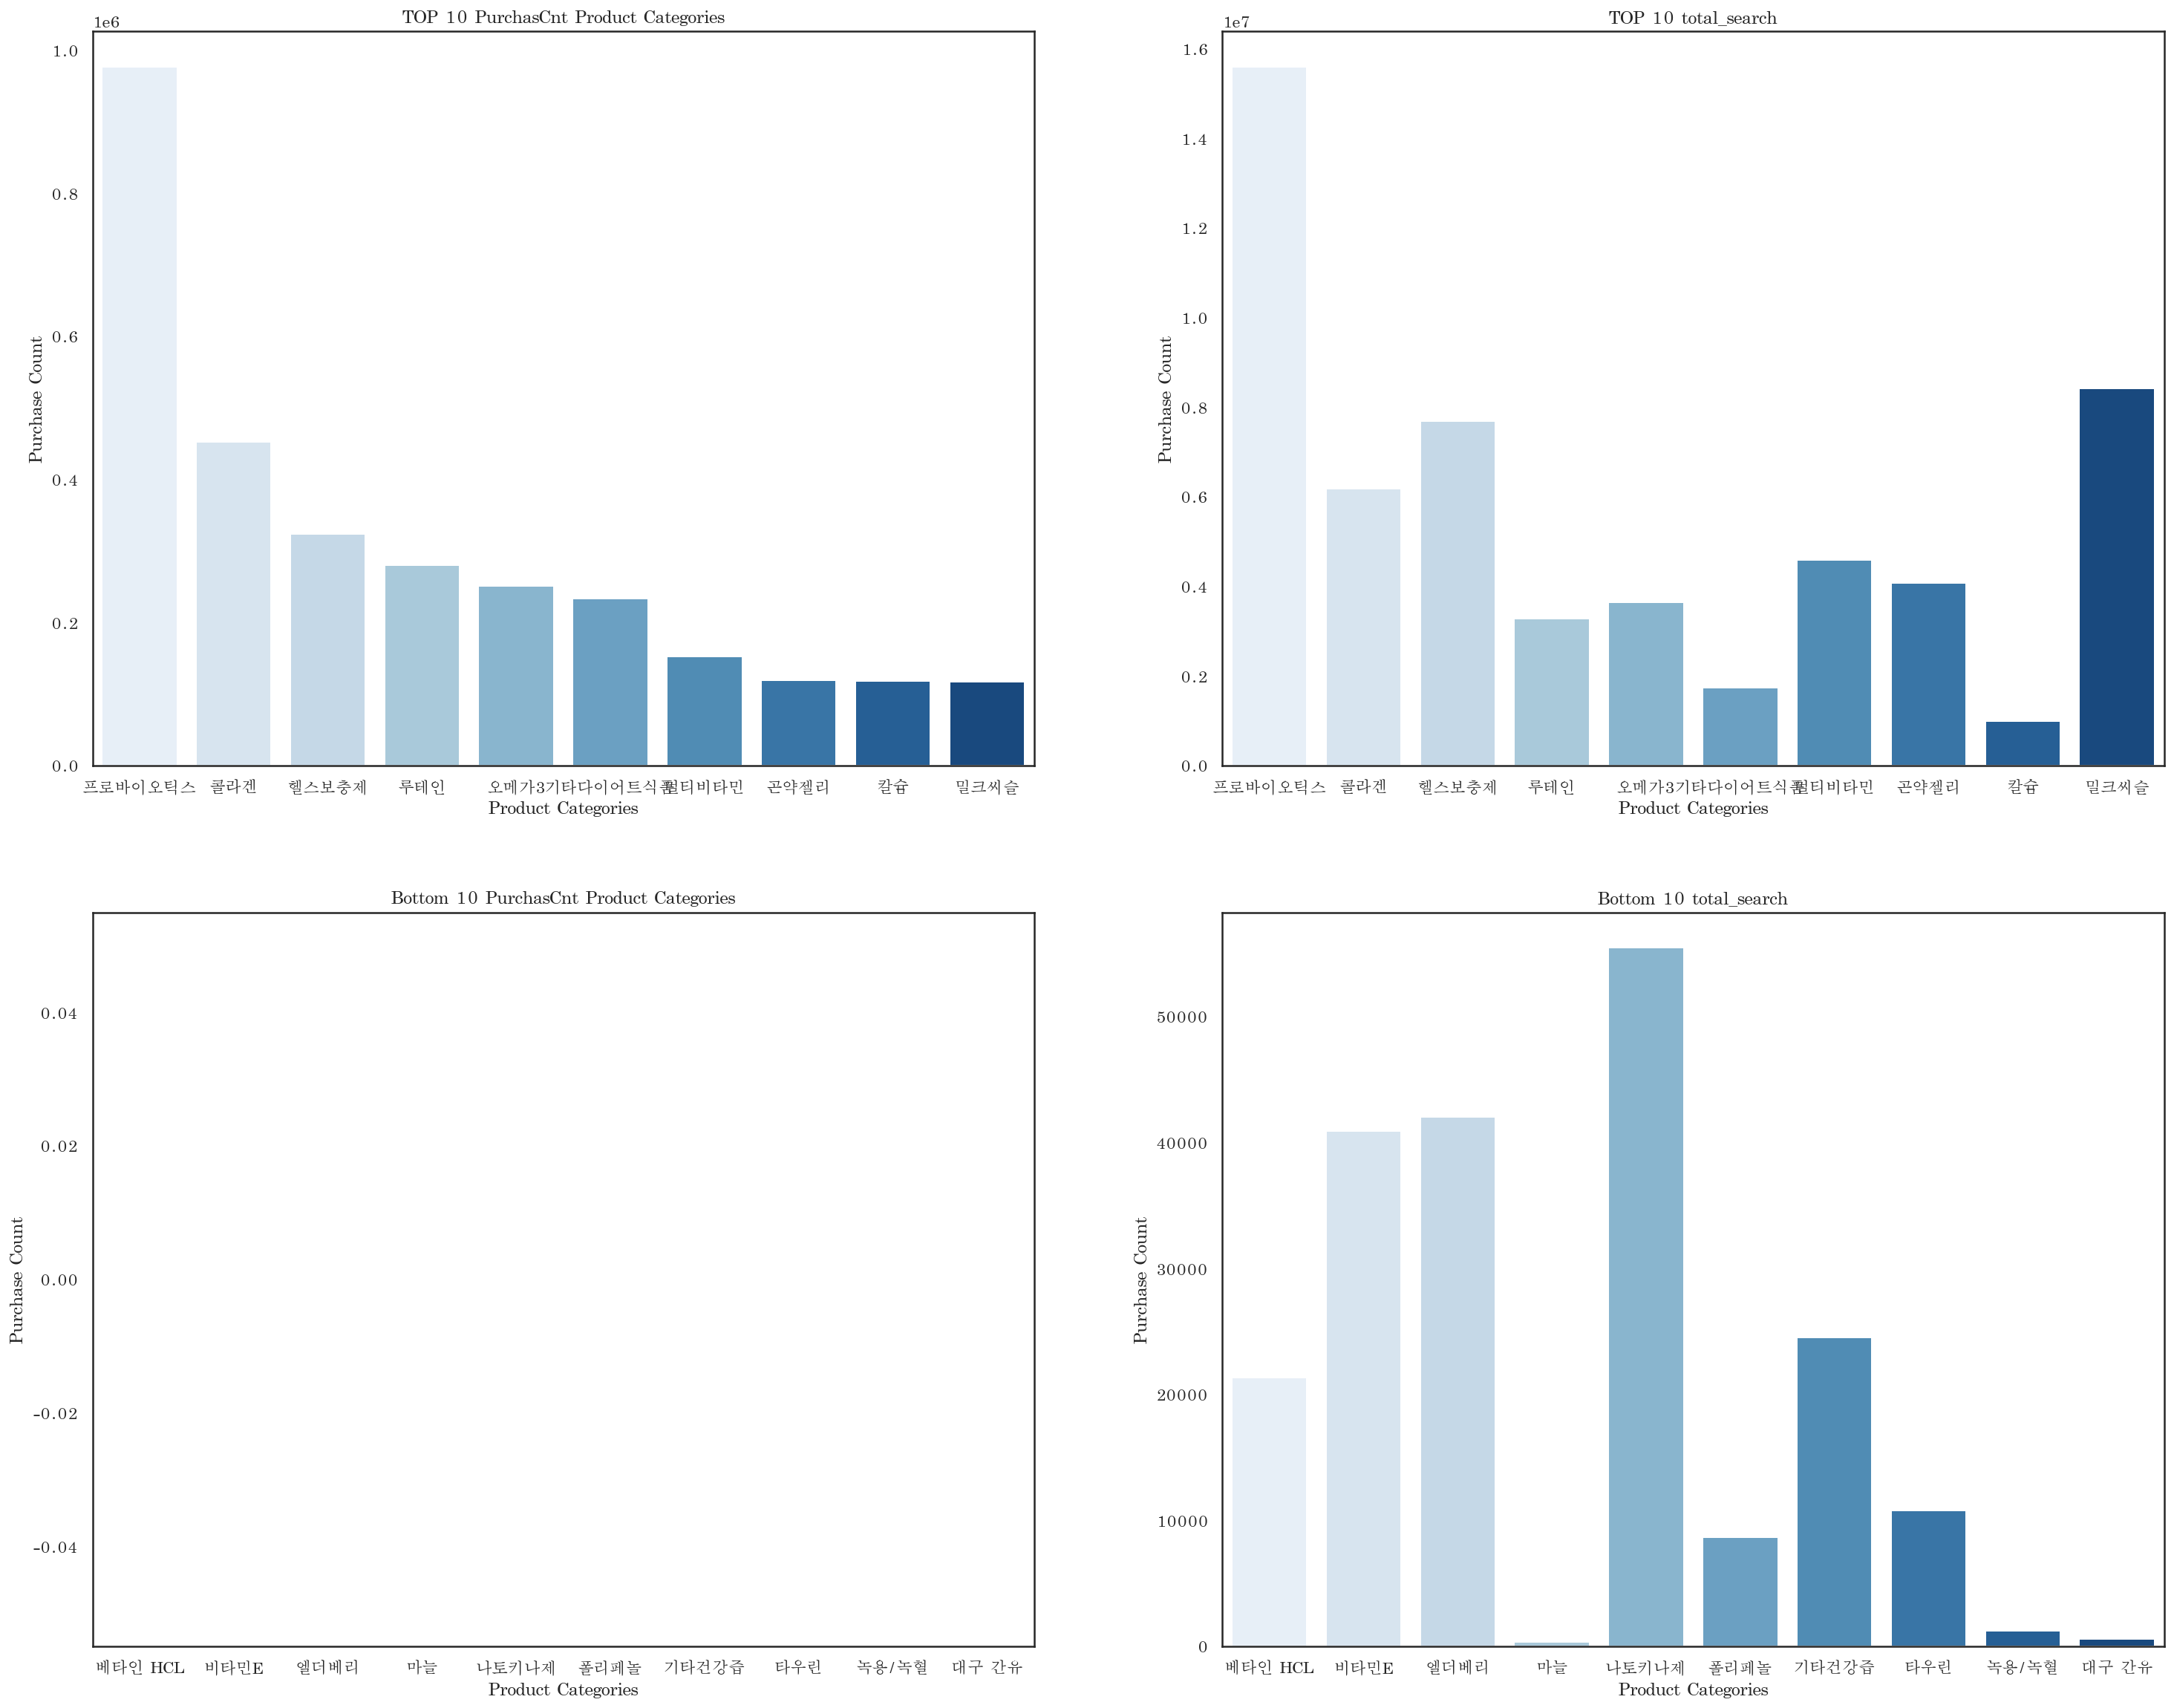

In [38]:
plt.figure(figsize=(25,20))

plt.subplot(221)
sns.barplot(x=top_10_product["cate_5"], y=top_10_product["purchaseCnt"], data=top_10_product, palette='Blues')
plt.title('TOP 10 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(222)
sns.barplot(x=top_10_product["cate_5"], y=top_10_product["total_search"], data=top_10_product, palette='Blues')
plt.title('TOP 10 total_search')
plt.xlabel('Product Categories')
plt.ylabel('total_search')

plt.subplot(223)
sns.barplot(x=bottom_10_product["cate_5"], y=bottom_10_product["purchaseCnt"], data=bottom_10_product, palette='Blues')
plt.title('Bottom 10 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(224)
sns.barplot(x=bottom_10_product["cate_5"], y=bottom_10_product["total_search"], data=bottom_10_product, palette='Blues')
plt.title('Bottom 10 total_search')
plt.xlabel('Product Categories')
plt.ylabel('total_search')

plt.show()

##### 제품 순위별 리뷰수와 검색수 비교
(1) top 10 제품들의 리뷰수와 검색수는 대체로 비슷하다

(2) bottom 10 제품들의 리뷰수와 검색수는 전혀 다르다

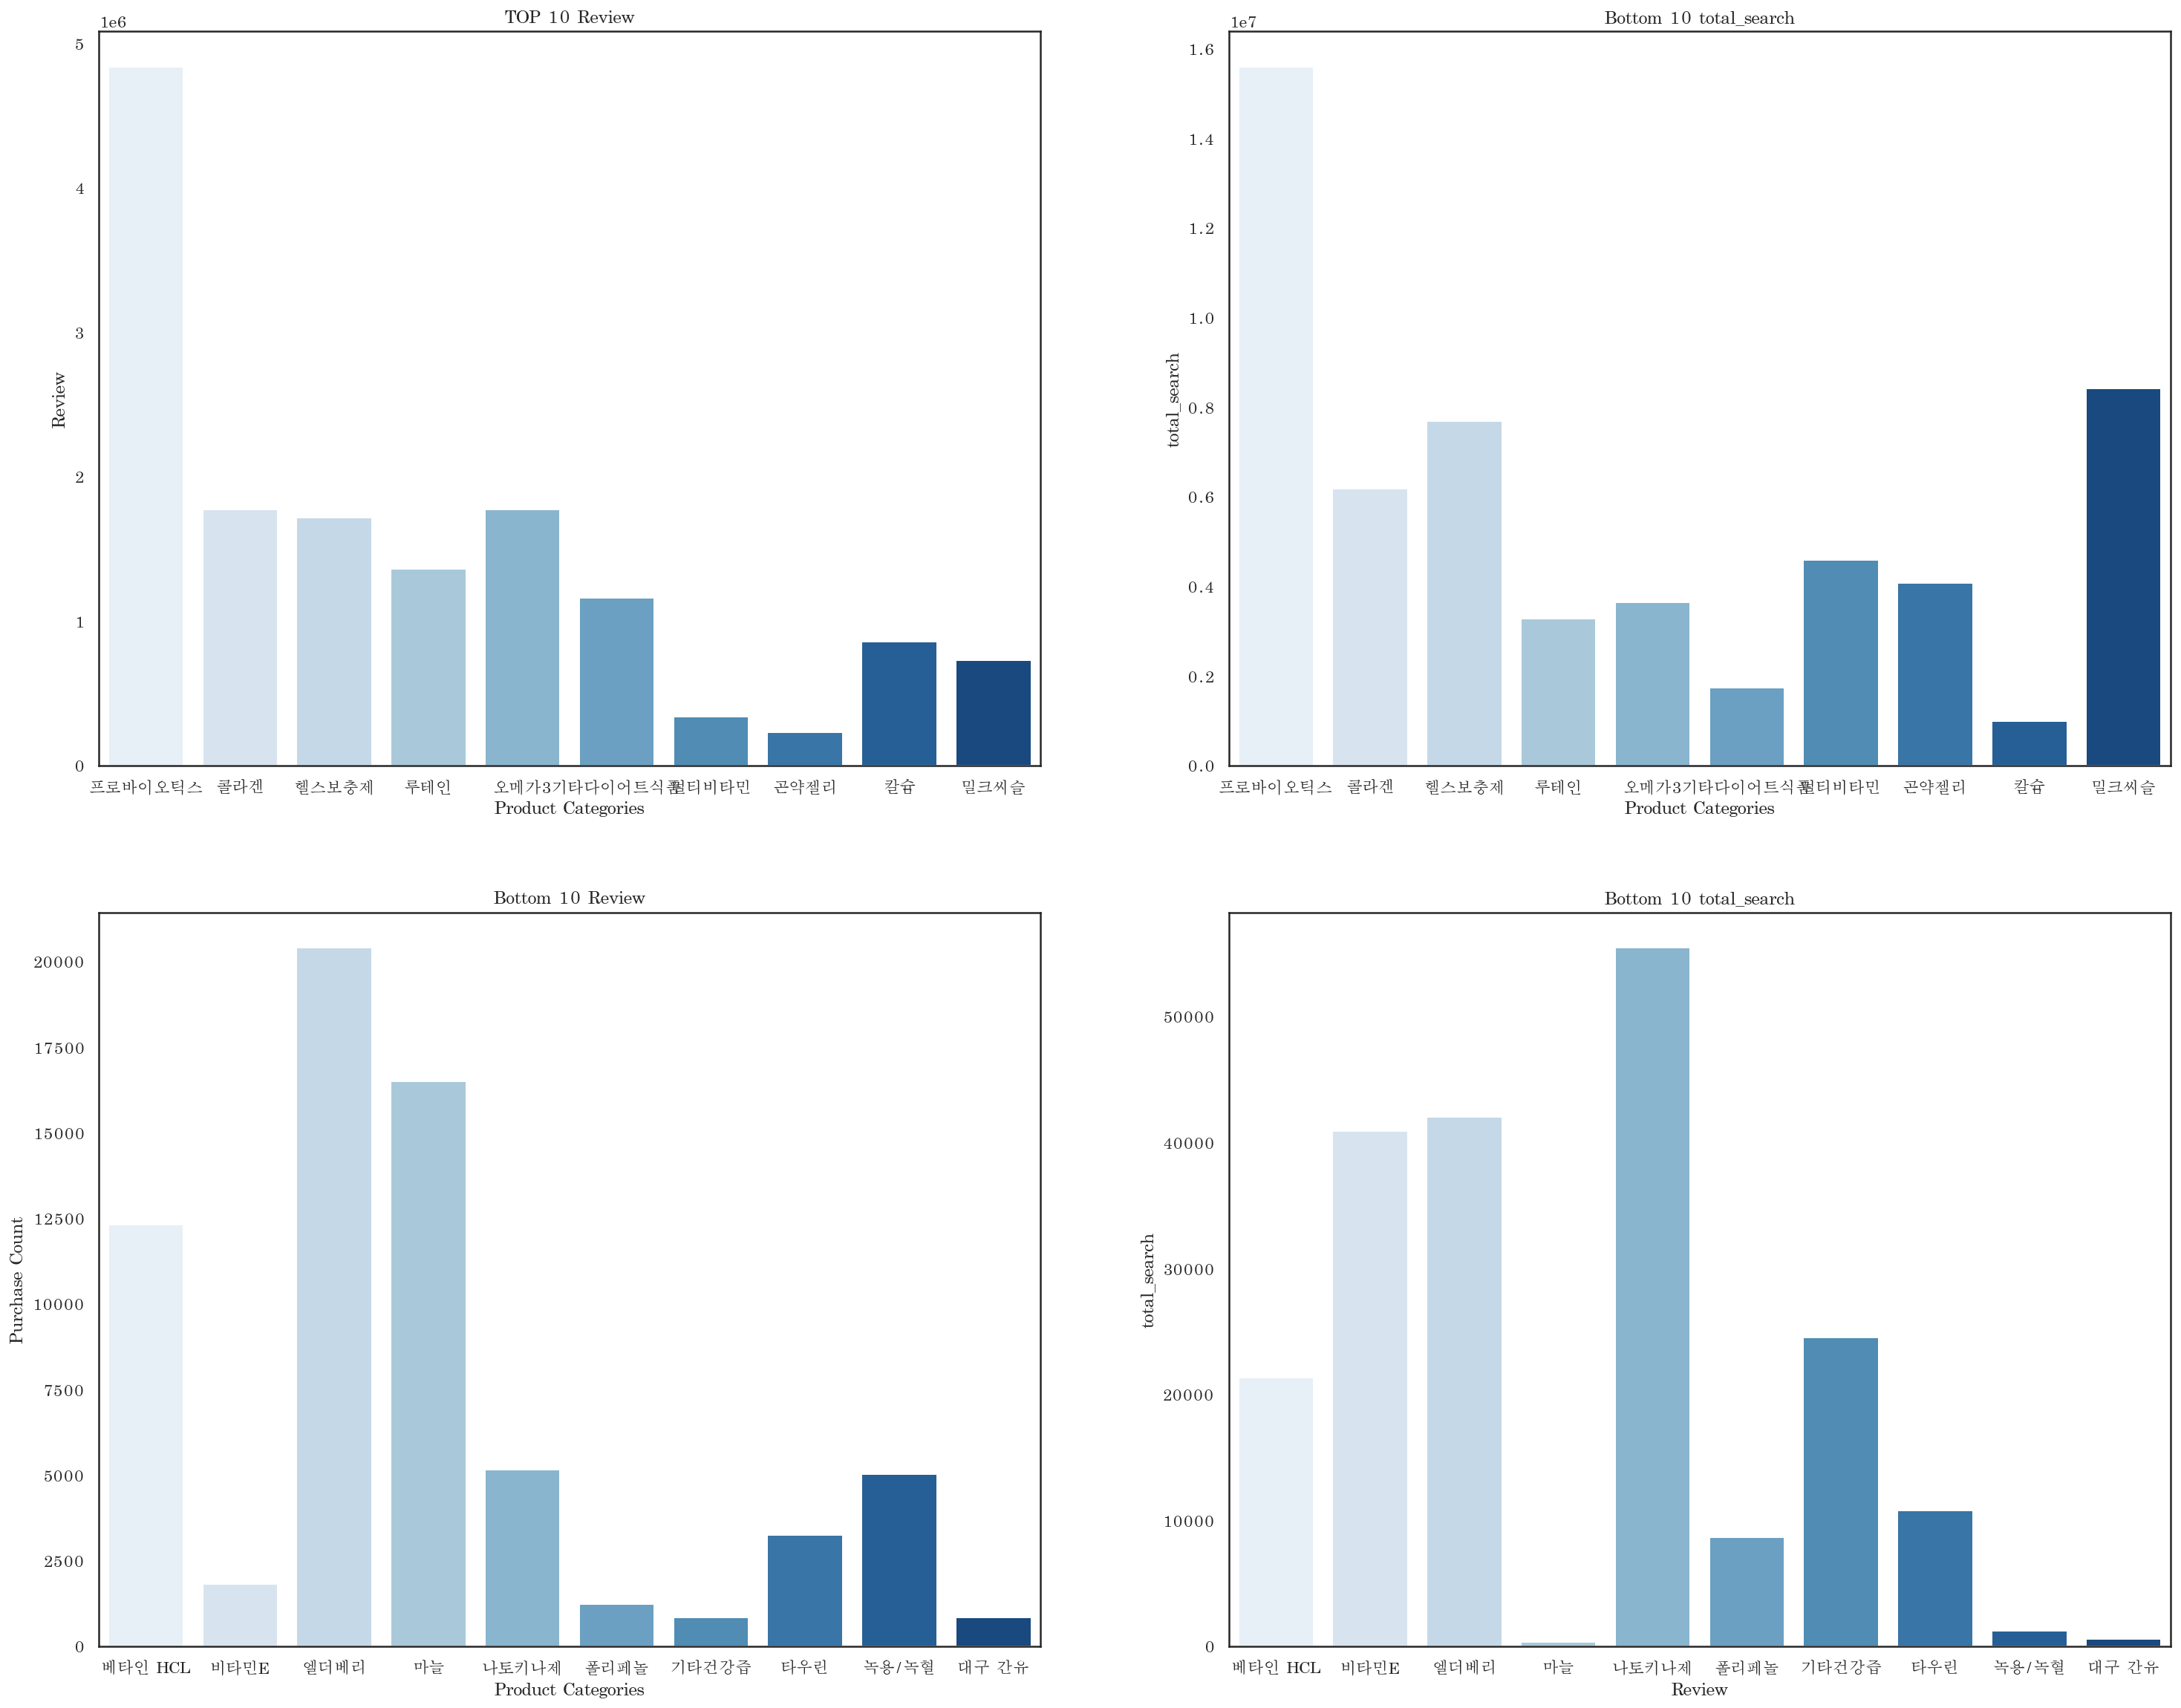

In [39]:
plt.figure(figsize=(25,20))

plt.subplot(221)
sns.barplot(x=top_10_product["cate_5"], y=top_10_product["review"], data=top_10_product, palette='Blues')
plt.title('TOP 10 Review')
plt.xlabel('Product Categories')
plt.ylabel('Review')

plt.subplot(222)
sns.barplot(x=top_10_product["cate_5"], y=top_10_product["total_search"], data=top_10_product, palette='Blues')
plt.title('Bottom 10 total_search')
plt.xlabel('Product Categories')
plt.ylabel('total_search')

plt.subplot(223)
sns.barplot(x=bottom_10_product["cate_5"], y=bottom_10_product["review"], data=bottom_10_product, palette='Blues')
plt.title('Bottom 10 Review')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(224)
sns.barplot(x=bottom_10_product["cate_5"], y=bottom_10_product["total_search"], data=bottom_10_product, palette='Blues')
plt.title('Bottom 10 total_search')
plt.xlabel('Review')
plt.ylabel('total_search')

plt.show()

##### 판매 상위 20개 제품의 쇼핑/검색 데이터 비교하기
- 221 : 쇼핑의 상위 20개 제품 중, 쇼핑/검색 공통 카테고리 (purchaseCnt)
- 222 : 검색의 상위 20개 제품 중, 쇼핑/검색 공통 카테고리 (total_search)

(1) 구매건수가 높은 제품들은 검색수도 높다

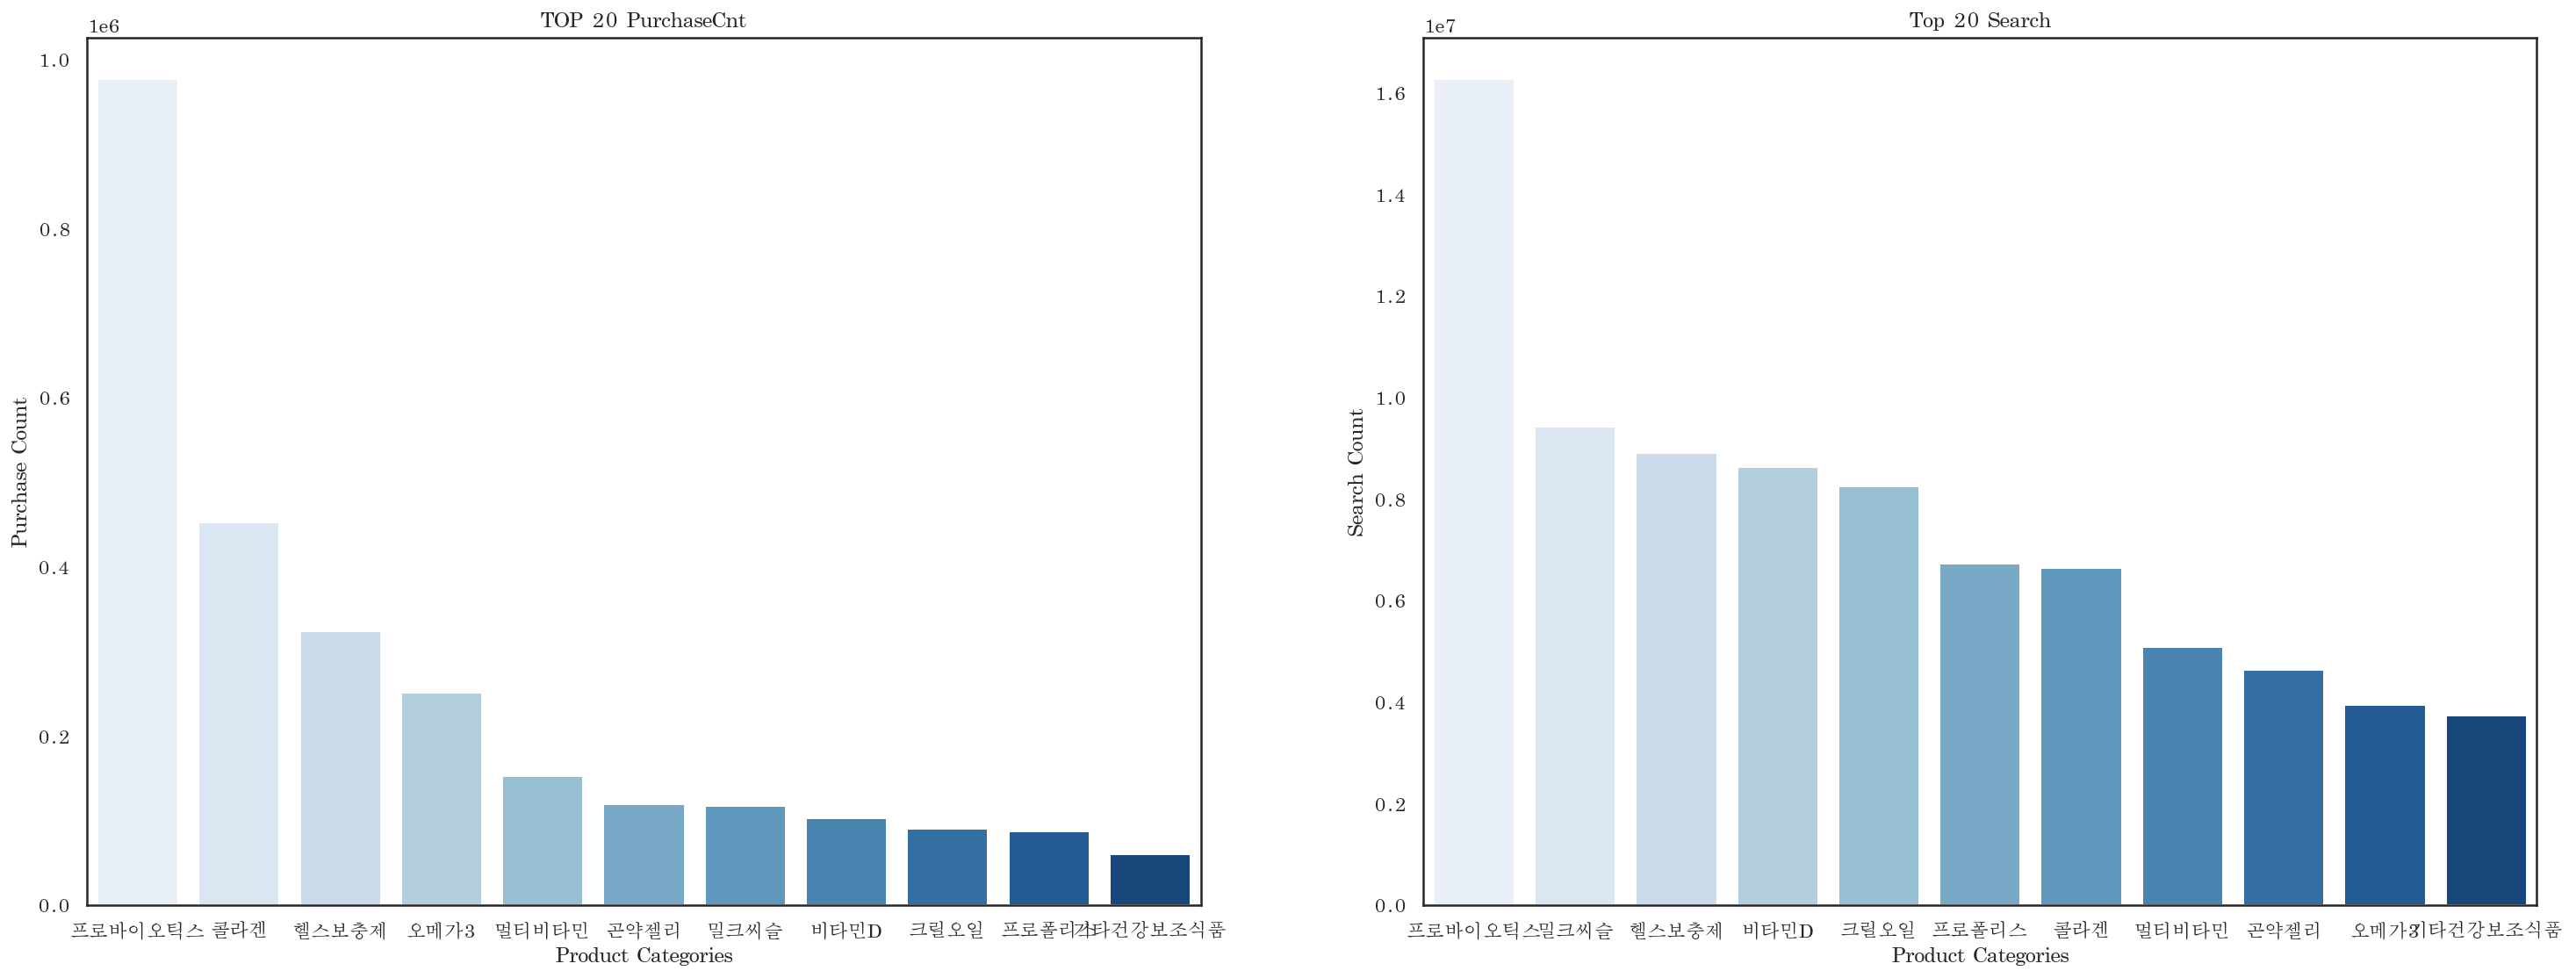

In [42]:
plt.figure(figsize=(25,20))

plt.subplot(221)
sns.barplot(x=top_10_common1["cate_5"], y=top_10_common1["purchaseCnt"], data=top_10_common1, palette='Blues')
plt.title('TOP 20 PurchaseCnt')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(222)
sns.barplot(x=top_10_common2["cate_5"], y=top_10_common2["total_search"], data=top_10_common2, palette='Blues')
plt.title('Top 20 Search')
plt.xlabel('Product Categories')
plt.ylabel('Search Count')

plt.show()

##### 판매 상위 20개 제품의 쇼핑/검색 랭크에 겹치지 않는 제품군 구매건수/검색수 비교
- 223 : 쇼핑의 상위 20개 제품중, 쇼핑에만 있는 카테고리 (purchaseCnt)의 구매건수와 검색수
- 224 : 검색의 상위 20개 제품중, 검색에만 있는 카테고리 (total_search)의 구매건수와 검색수

(1) 쇼핑에서 상위 20개에 포함된 제품은 검색수도 높다

(2) 검색에서 상위 20개에 포함되었지만 구매건수는 낮다

-> 잘 팔리는 제품은 구매건수와 검색수가 모두 높지만
-> 잘 팔리지 않는 제품은 검색수가 높은 반면 구매건수는 낮다

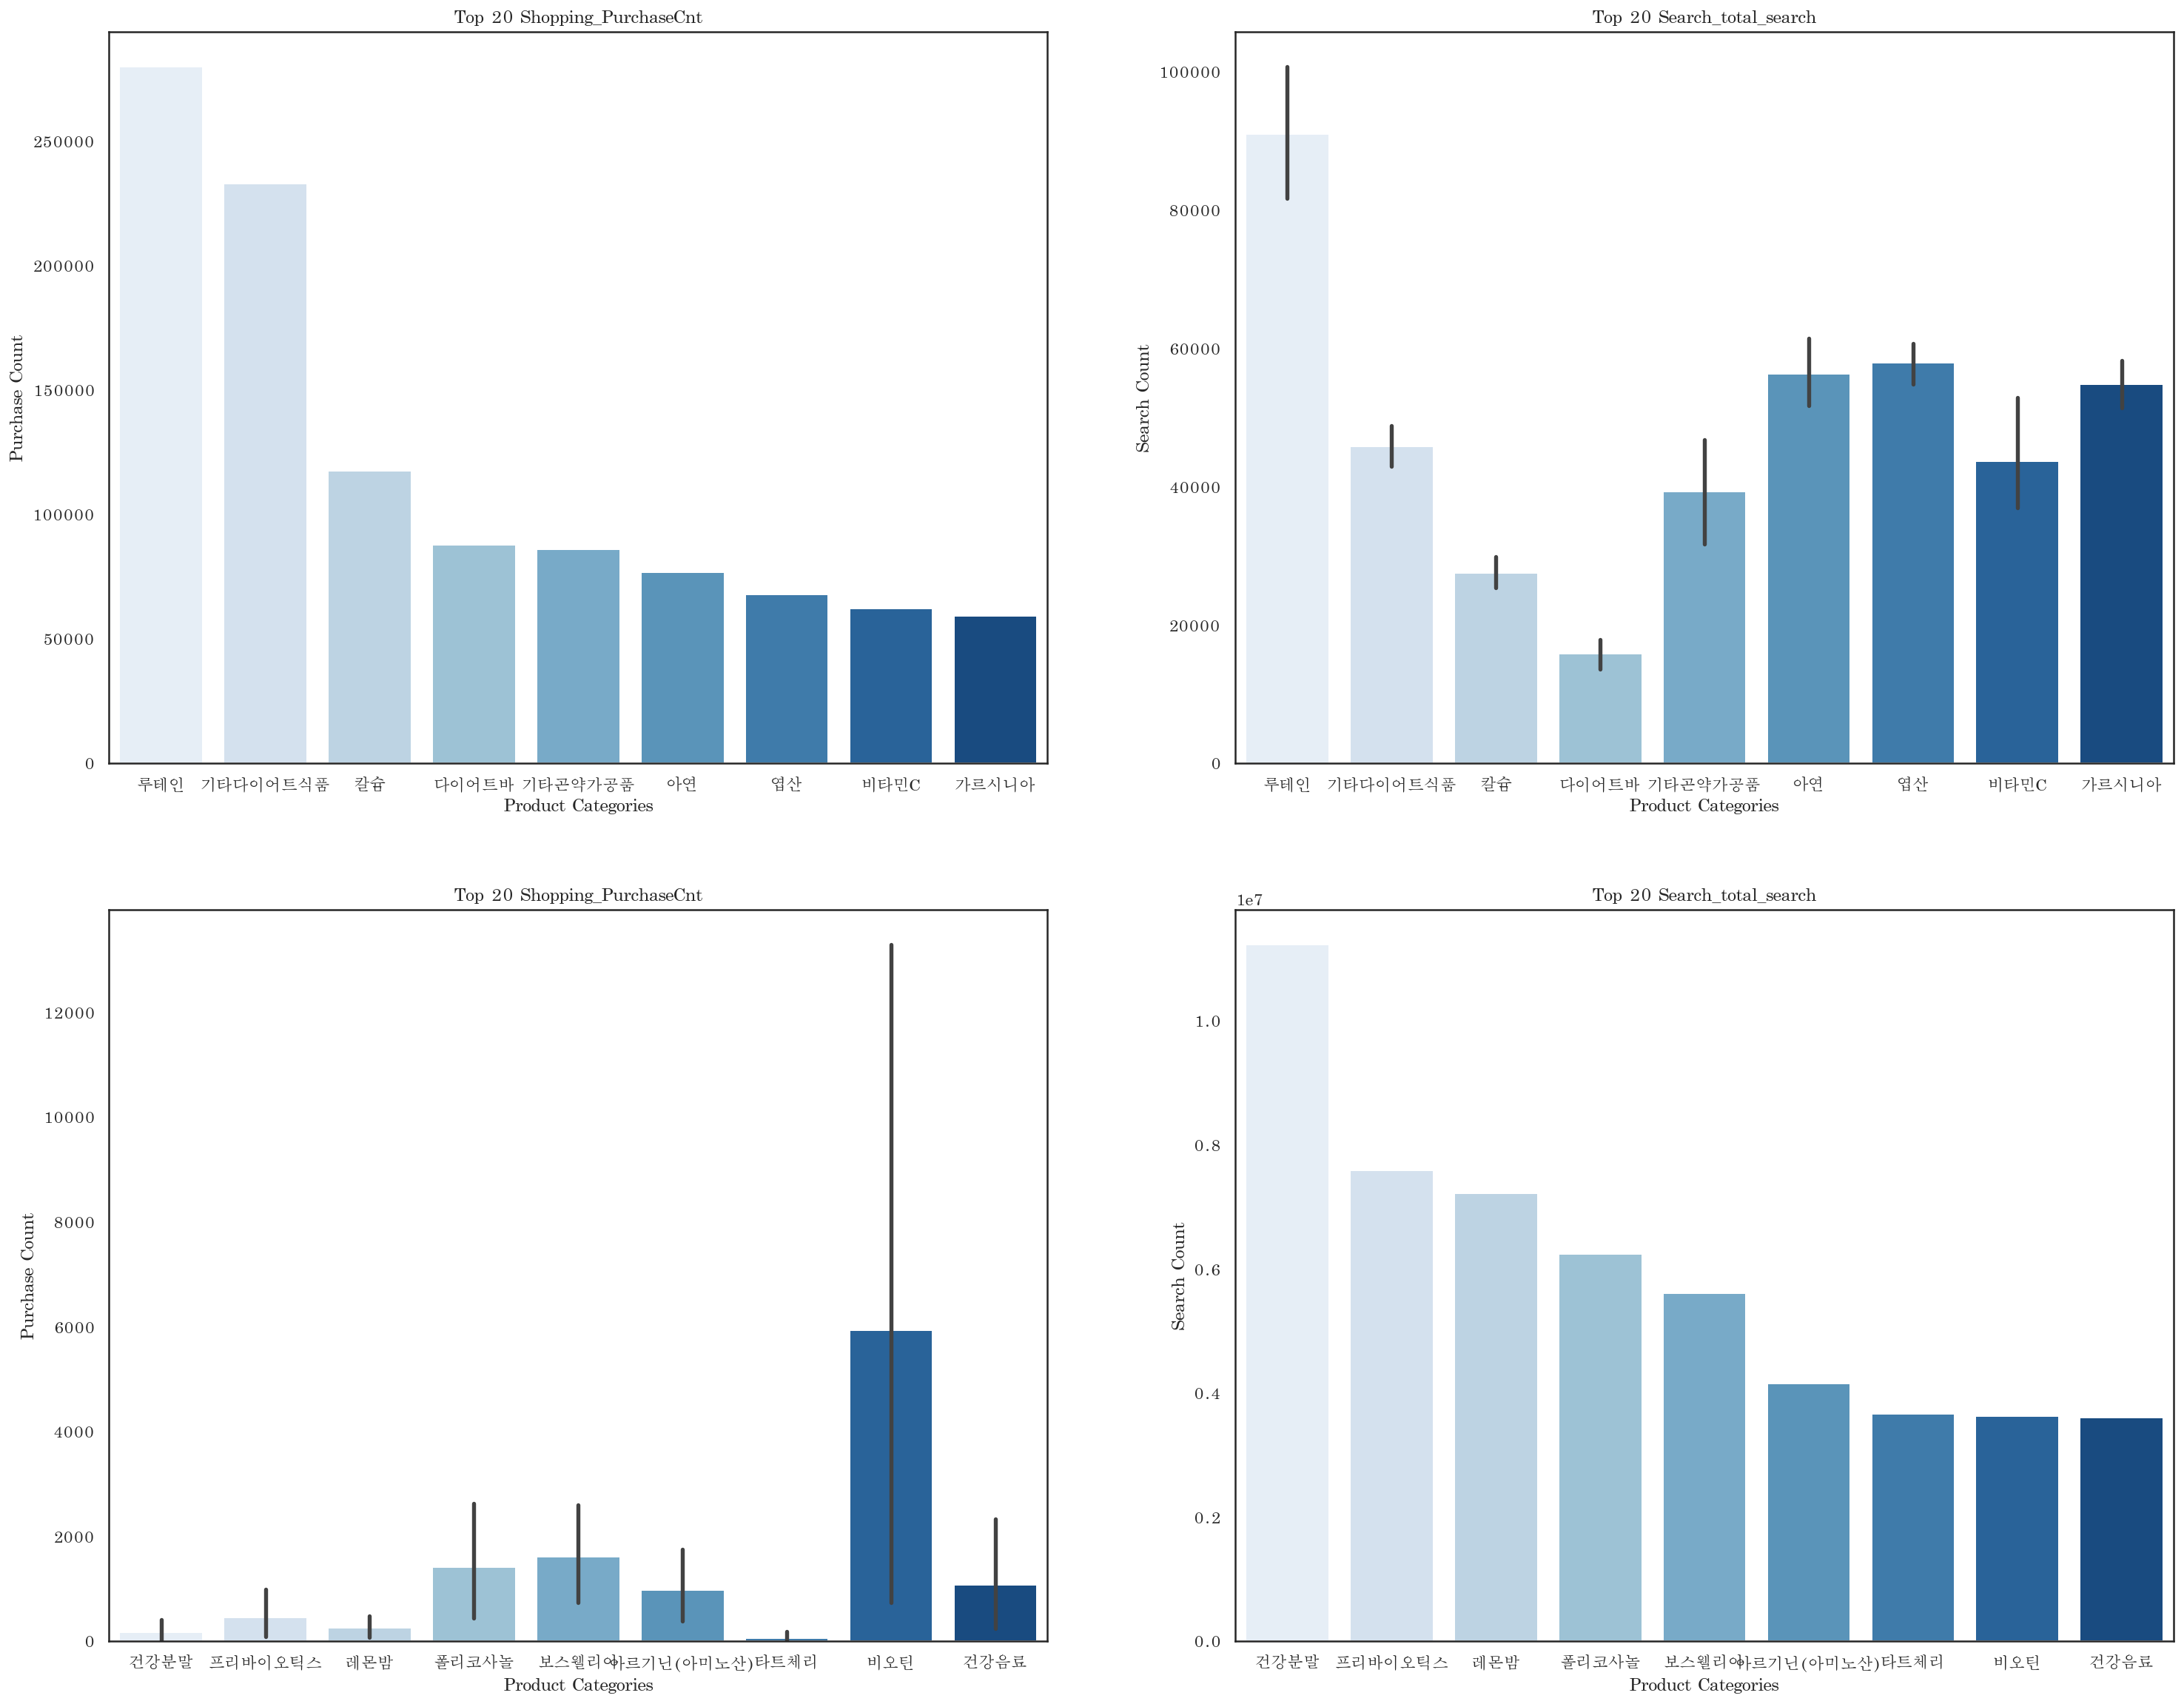

In [43]:
plt.figure(figsize=(25,20))
plt.subplot(221)
sns.barplot(x=top_10_non_common1["cate_5"], y=top_10_non_common1["purchaseCnt"], data=top_10_non_common1, palette='Blues')
plt.title('Top 20 Shopping_PurchaseCnt')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(222)
sns.barplot(x=masking_shopping["cate_5"], y=masking_shopping["total_search"], data=masking_shopping, palette='Blues', order=["루테인", "기타다이어트식품","칼슘", "다이어트바","기타곤약가공품","아연", "엽산", "비타민C", "가르시니아"])
plt.title('Top 20 Search_total_search')
plt.xlabel('Product Categories')
plt.ylabel('Search Count')

plt.subplot(223)
sns.barplot(x=masking_searching["cate_5"], y=masking_searching["purchaseCnt"], data=masking_searching, palette='Blues', order=["건강분말", "프리바이오틱스","레몬밤", "폴리코사놀","보스웰리아","아르기닌(아미노산)", "타트체리", "비오틴", "건강음료"])
plt.title('Top 20 Shopping_PurchaseCnt')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(224)
sns.barplot(x=top_10_non_common2["cate_5"], y=top_10_non_common2["total_search"], data=top_10_non_common2, palette='Blues')
plt.title('Top 20 Search_total_search')
plt.xlabel('Product Categories')
plt.ylabel('Search Count')

plt.show()

##### 시각화2_ 상위 10개 제품의 가격과 검색량
- 구매 랭크 10위 제품들의 평균 가격과 검색량
- 구매 랭크 하위 10위 제품들의 평균 가격과 검색량

(1) 상위 10개 제품은 가격은 높고 비교적 검색량은 낮다

(2) 하위 10개 제품은 가격은 낮지만 검색량은 제각각이다

-> 가격이 구매에 영향을 주지 않는다

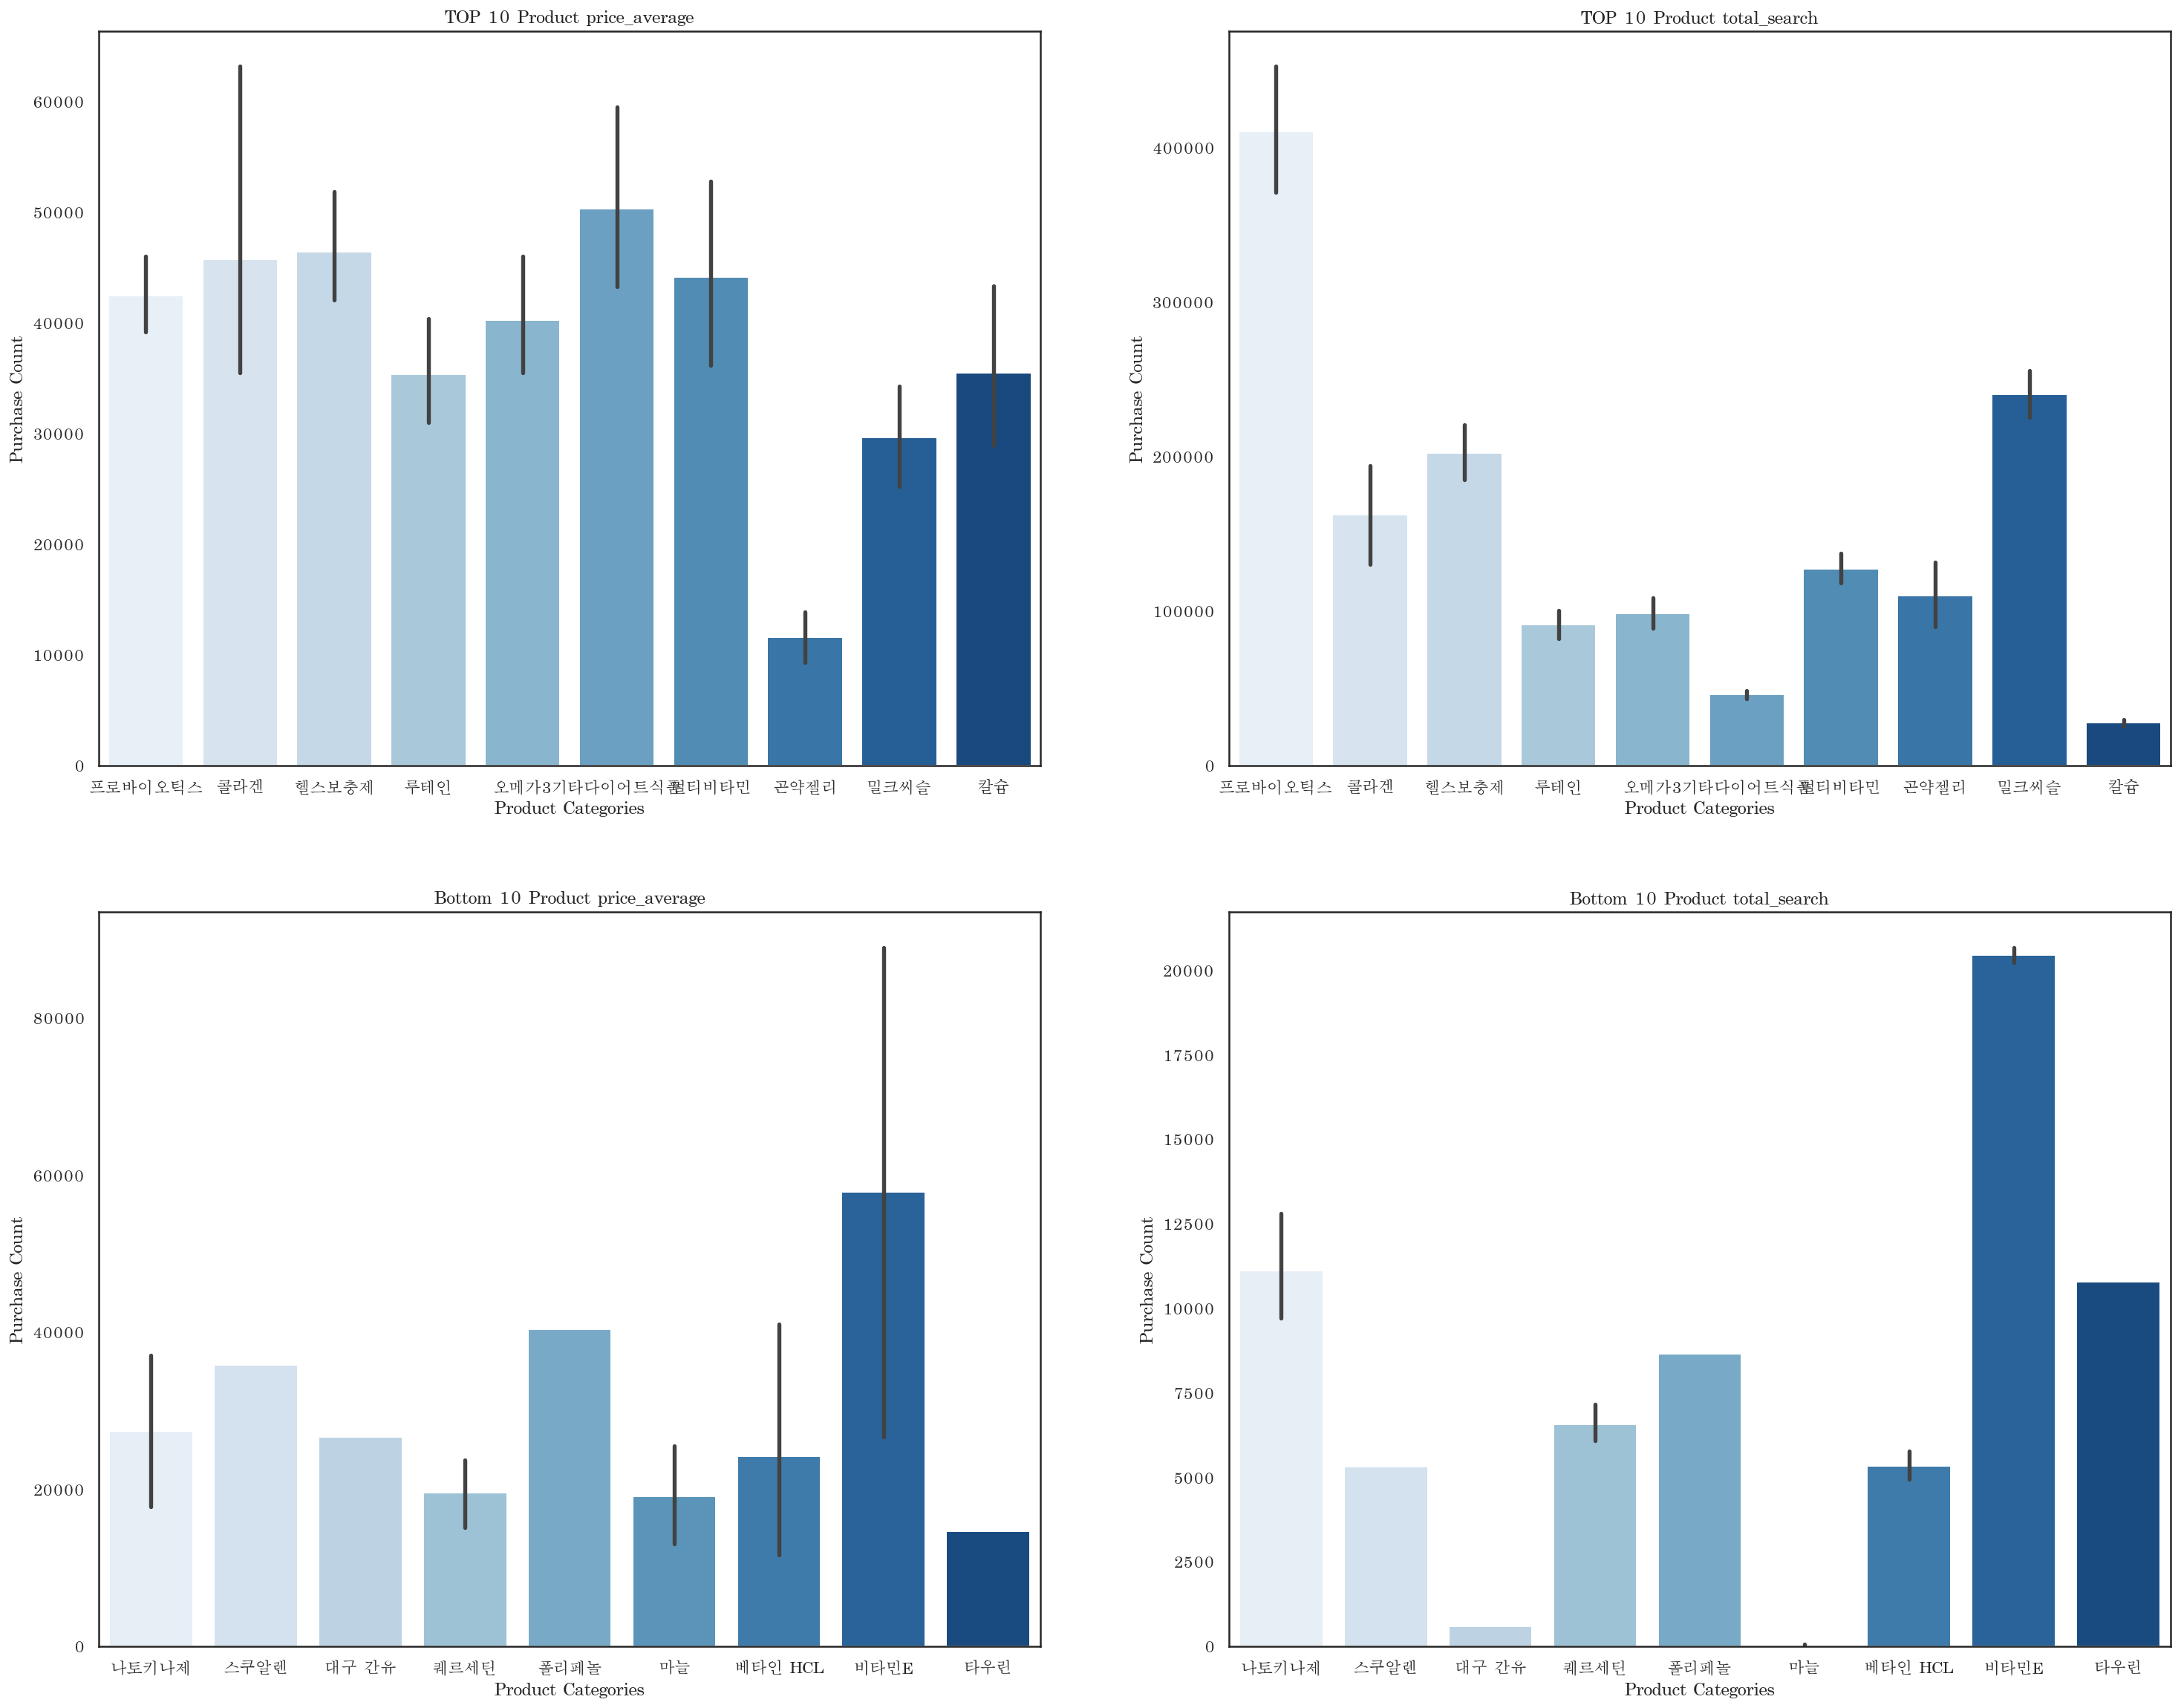

In [55]:
plt.figure(figsize=(25,20))

plt.subplot(221)
sns.barplot(x=top10["cate_5"], y=top10["price_avg"], data=top10, palette='Blues')
plt.title('TOP 10 Product price_average')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(222)
sns.barplot(x=top10["cate_5"], y=top10["total_search"], data=top10, palette='Blues')
plt.title('TOP 10 Product total_search')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(223)
sns.barplot(x=bottom10["cate_5"], y=bottom10["price_avg"], data=bottom10, palette='Blues')
plt.title('Bottom 10 Product price_average')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(224)
sns.barplot(x=bottom10["cate_5"], y=bottom10["total_search"], data=bottom10, palette='Blues')
plt.title('Bottom 10 Product total_search')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.show()

###### 제품 랭크에 따른 리뷰수와 검색수 비교
- 구매 랭크 10위 제품들의 리뷰수와 검색수
- 구매 랭크 하위 10위 제품들의 리뷰수와 검색수


(1) 상위 10개 제품은 리뷰수가 비교적 많고, 검색수 그래프도 비교적 비슷하다

(2) 하위 10개 제품은 상위 제품에 비해 리뷰수가 비교적 적고, 검색수 그래프는 현지히 적다

(3) 상위 20개 제품중, 쇼핑에서만 랭크에 들어가 있는 제품은 리뷰수도 많고 검색수도 비슷하다

(4) 상위 20개 제품중, 검색에서만 랭크에 들어가 있는 제품은 리뷰수는 적고 검색수는 비교적 많다

-> 잘 팔리는 제품들은 리뷰수가 많은 경우가 많고, 검색수도 비슷하지만
-> 잘 팔리지 않는 제품들은 리뷰수가 적은 경우가 많고 검색수도 적다

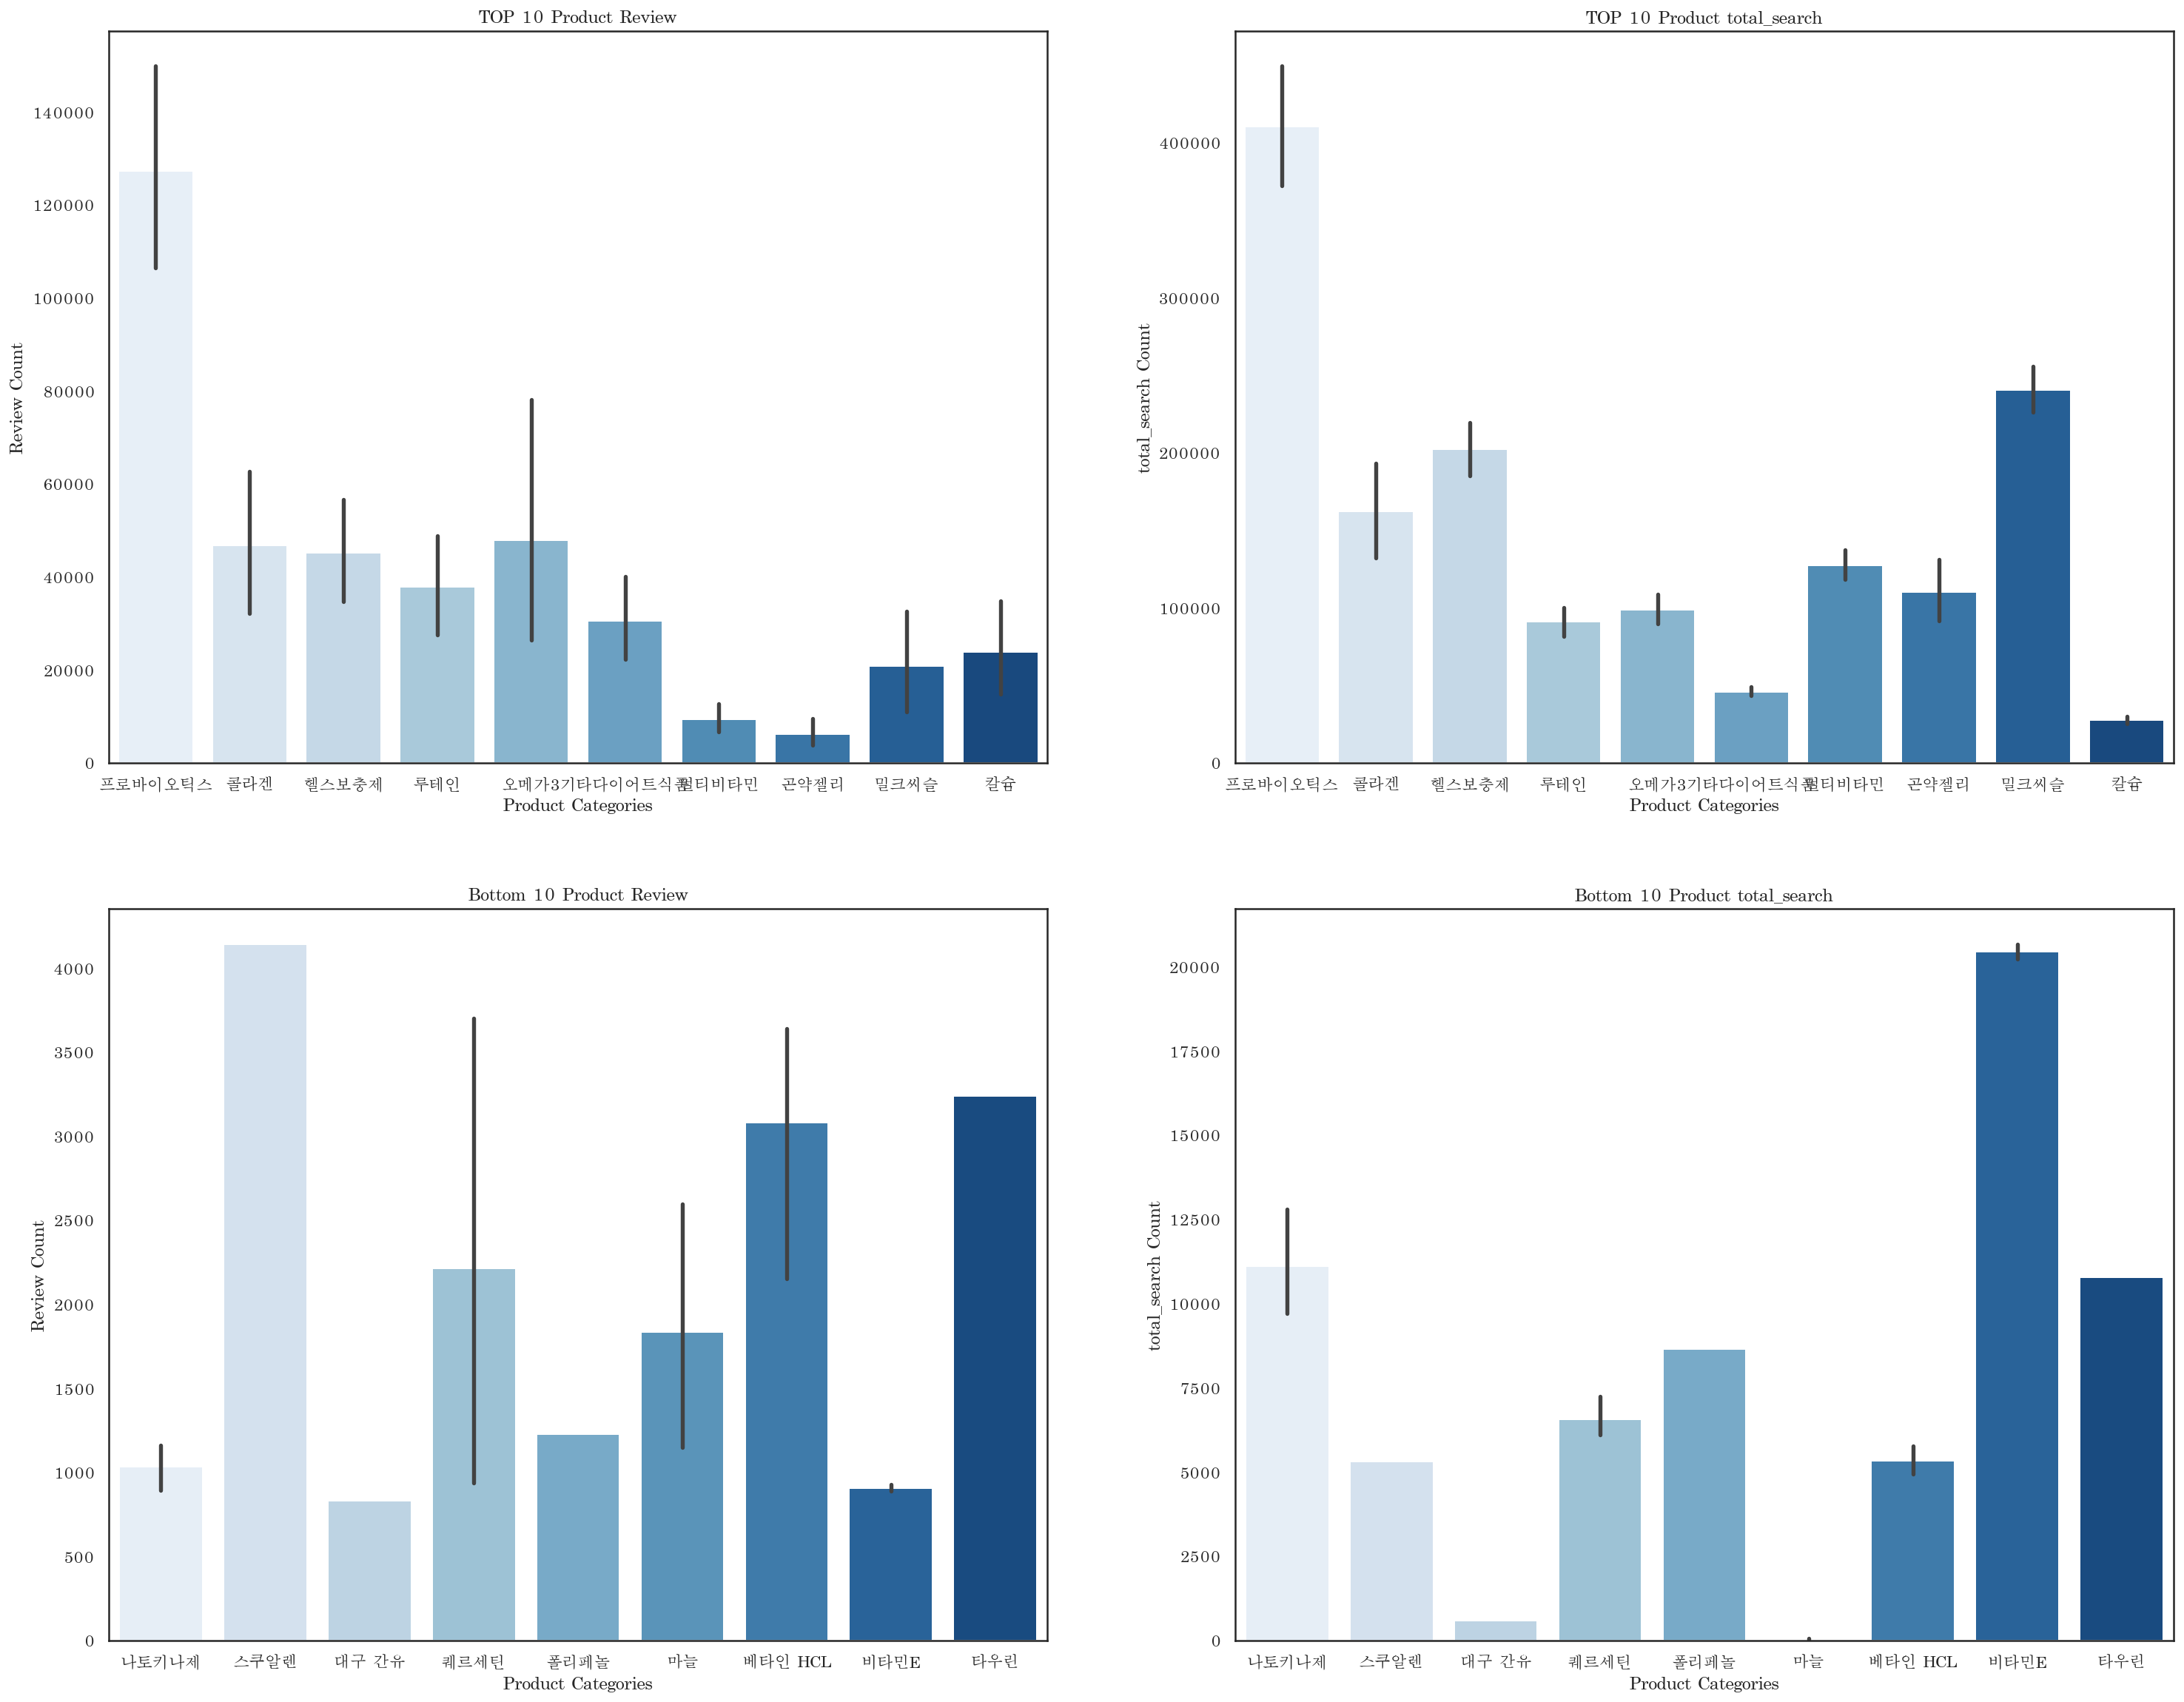

In [58]:
plt.figure(figsize=(25,20))

plt.subplot(221)
sns.barplot(x=top10["cate_5"], y=top10["review"], data=top10, palette='Blues')
plt.title('TOP 10 Product Review')
plt.xlabel('Product Categories')
plt.ylabel('Review Count')

plt.subplot(222)
sns.barplot(x=top10["cate_5"], y=top10["total_search"], data=top10, palette='Blues')
plt.title('TOP 10 Product total_search')
plt.xlabel('Product Categories')
plt.ylabel('total_search Count')

plt.subplot(223)
sns.barplot(x=bottom10["cate_5"], y=bottom10["review"], data=bottom10, palette='Blues')
plt.title('Bottom 10 Product Review')
plt.xlabel('Product Categories')
plt.ylabel('Review Count')

plt.subplot(224)
sns.barplot(x=bottom10["cate_5"], y=bottom10["total_search"], data=bottom10, palette='Blues')
plt.title('Bottom 10 Product total_search')
plt.xlabel('Product Categories')
plt.ylabel('total_search Count')

plt.show()

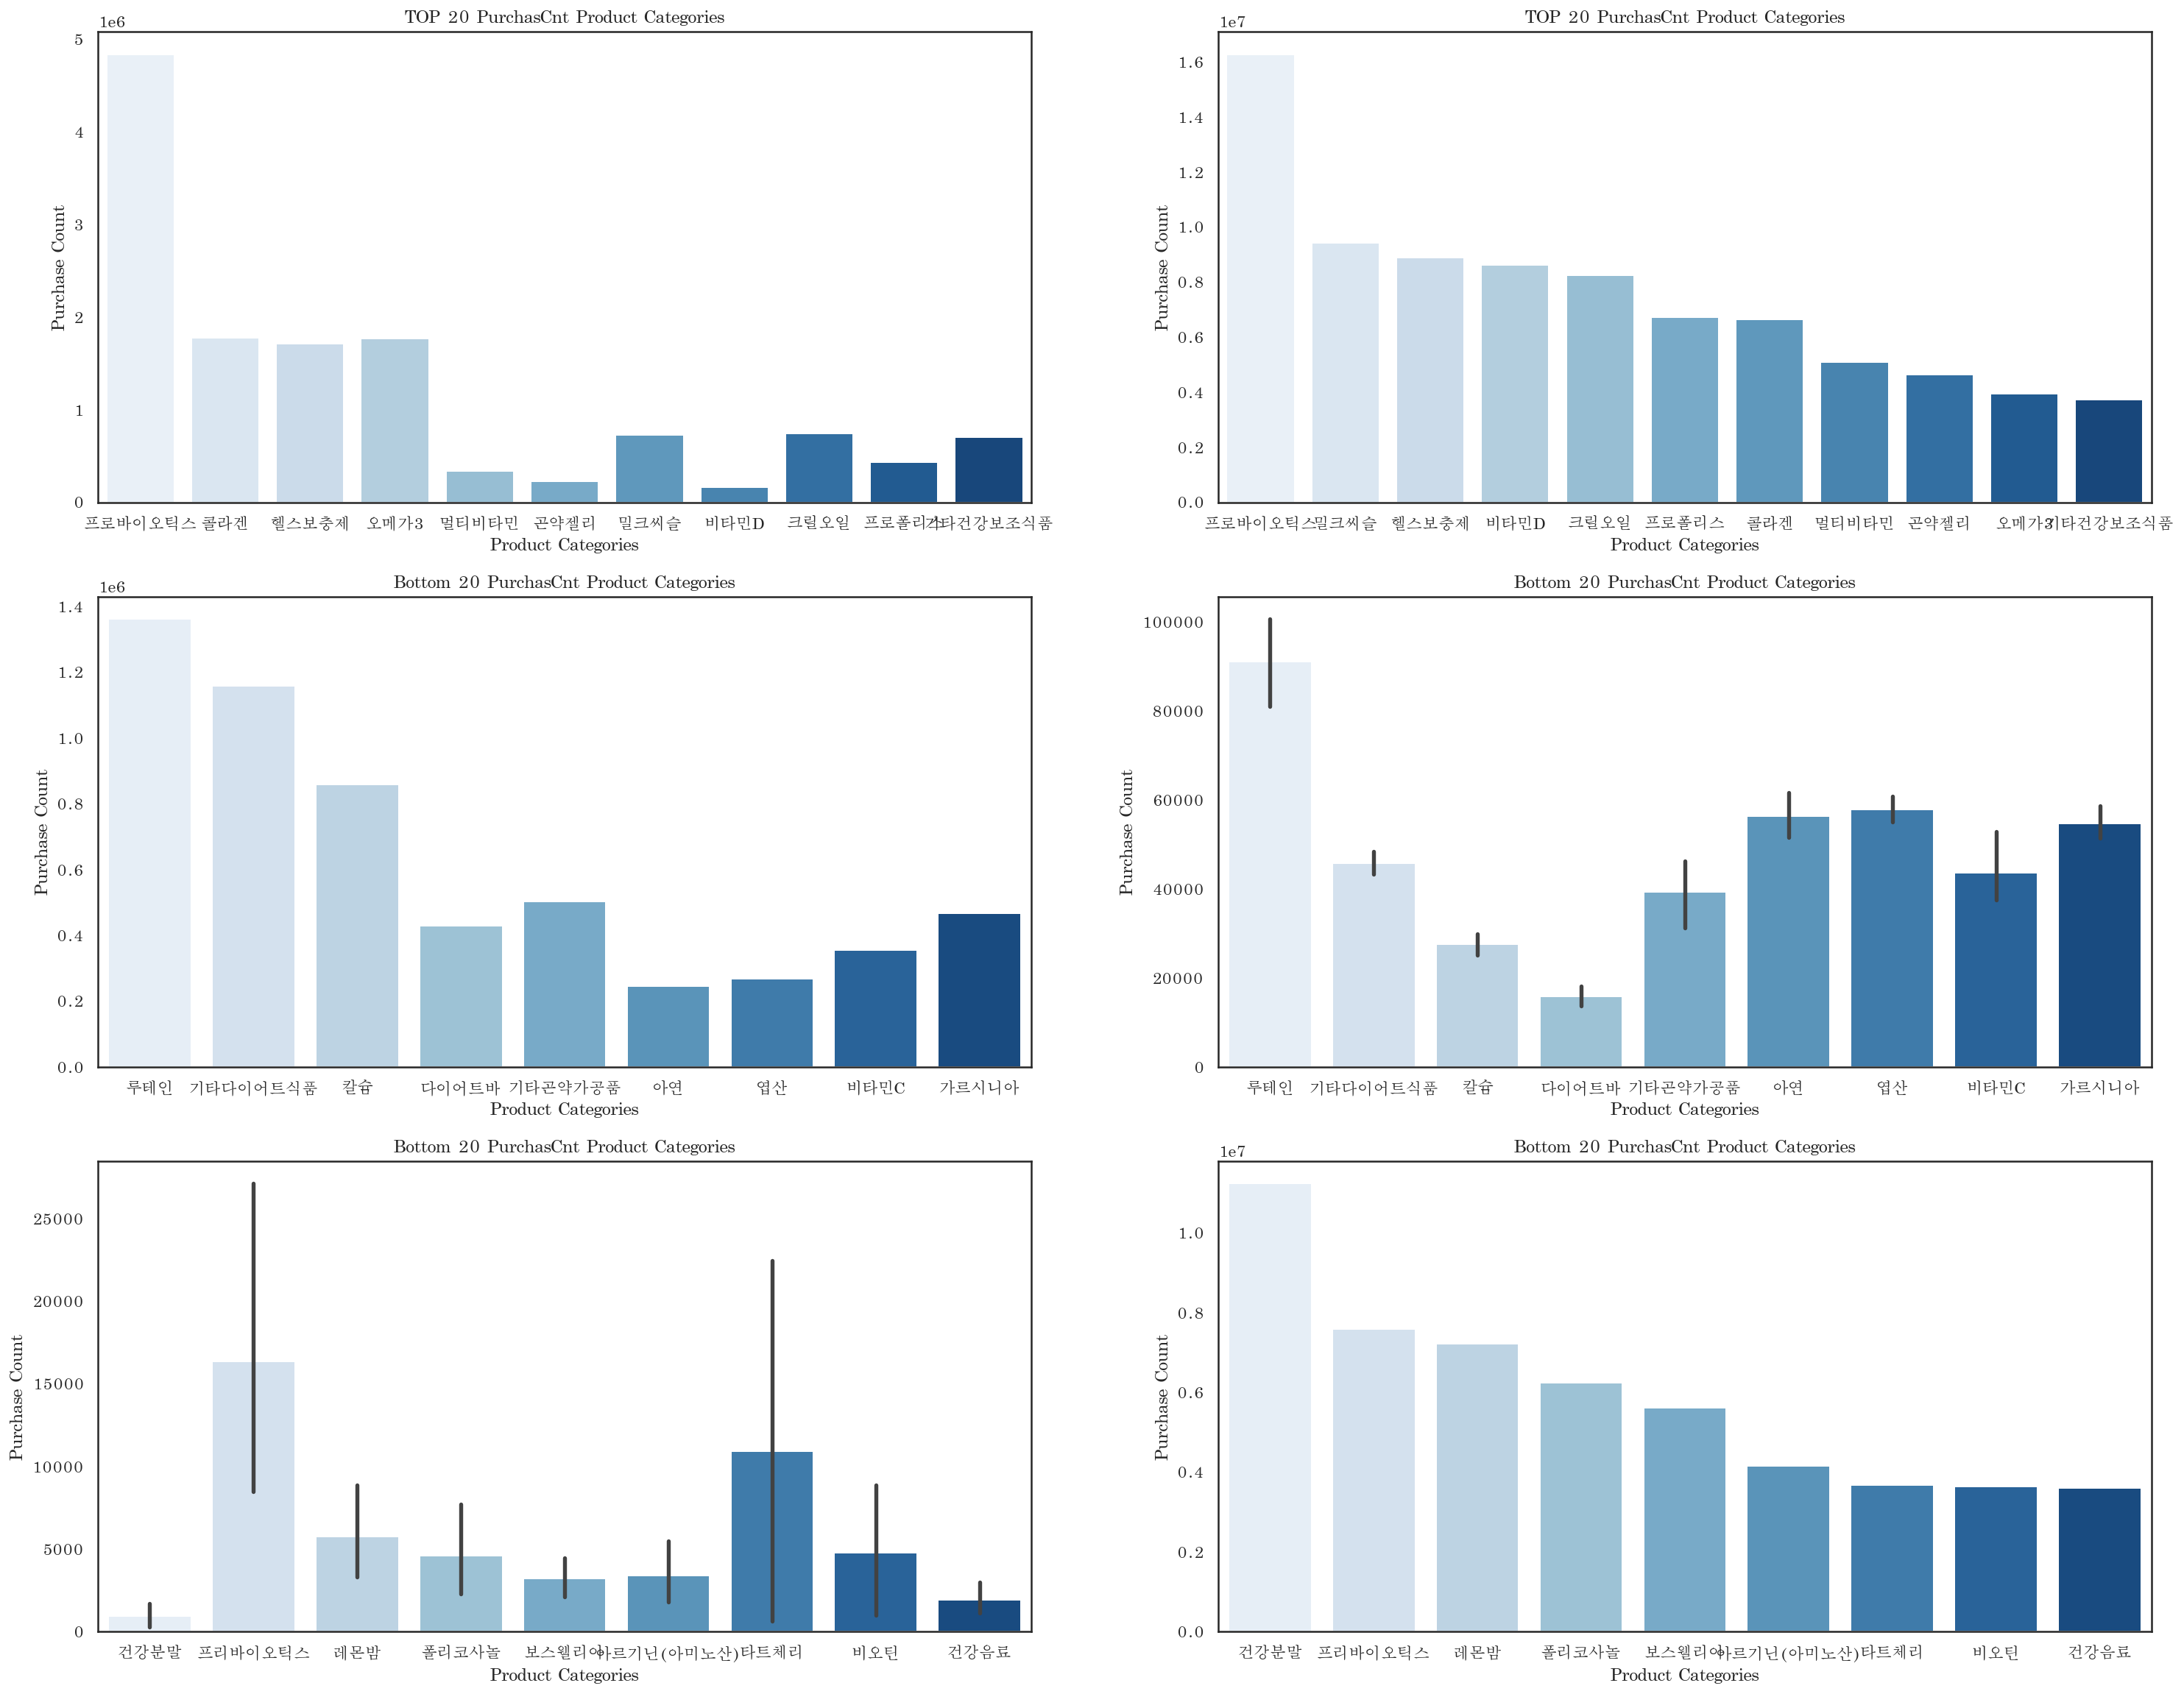

In [69]:
plt.figure(figsize=(25,20))

plt.subplot(321)
sns.barplot(x=top_10_common1["cate_5"], y=top_10_common1["review"], data=top_10_common1, palette='Blues')
plt.title('TOP 20 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(322)
sns.barplot(x=top_10_common2["cate_5"], y=top_10_common2["total_search"], data=top_10_common2, palette='Blues')
plt.title('TOP 20 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(323)
sns.barplot(x=top_10_non_common1["cate_5"], y=top_10_non_common1["review"], data=top_10_non_common1, palette='Blues', order=["루테인", "기타다이어트식품","칼슘", "다이어트바","기타곤약가공품","아연", "엽산", "비타민C", "가르시니아"])
plt.title('Bottom 20 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(324)
sns.barplot(x=masking_shopping["cate_5"], y=masking_shopping["total_search"], data=masking_shopping, palette='Blues', order=["루테인", "기타다이어트식품","칼슘", "다이어트바","기타곤약가공품","아연", "엽산", "비타민C", "가르시니아"])
plt.title('Bottom 20 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(325)
sns.barplot(x=masking_searching["cate_5"], y=masking_searching["review"], data=masking_searching, palette='Blues', order=["건강분말", "프리바이오틱스","레몬밤", "폴리코사놀","보스웰리아","아르기닌(아미노산)", "타트체리", "비오틴", "건강음료"])
plt.title('Bottom 20 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.subplot(326)
sns.barplot(x=top_10_non_common2["cate_5"], y=top_10_non_common2["total_search"], data=top_10_non_common2, palette='Blues', order=["건강분말", "프리바이오틱스","레몬밤", "폴리코사놀","보스웰리아","아르기닌(아미노산)", "타트체리", "비오틴", "건강음료"])
plt.title('Bottom 20 PurchasCnt Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Purchase Count')

plt.show()

###### 시각화 4_ 살펴본 내용 정리
(1) 잘 팔리는 제품 상위 10개 
    - 구매건수도 많고, 리뷰도 비슷한 그래프를 보이며, 평균 가격은 높고, 검색수도 비교적 많다
    
(2) 잘 팔리지 않는 제품 10개
    - 구매건수는 없고, 리뷰와 검색수도 적지만 평균 가격도 낮다

- 가격은 구매에 큰 영향을 미치지 않는다
(가격이 비싸거나 저렴하다고 구매건수가 많거나 적지 않다)
- 검색량이 많다면 대체로 잘 팔리는 상품일 확률이 높다

- 구매가 많은 제품들은
(1) 검색수가 많고
(2) 리뷰수가 많다

- 구매가 적은 제품들은
(1),(2)가 적다

- 가격은 구매에 영향을 주지 않을 확률이 높다

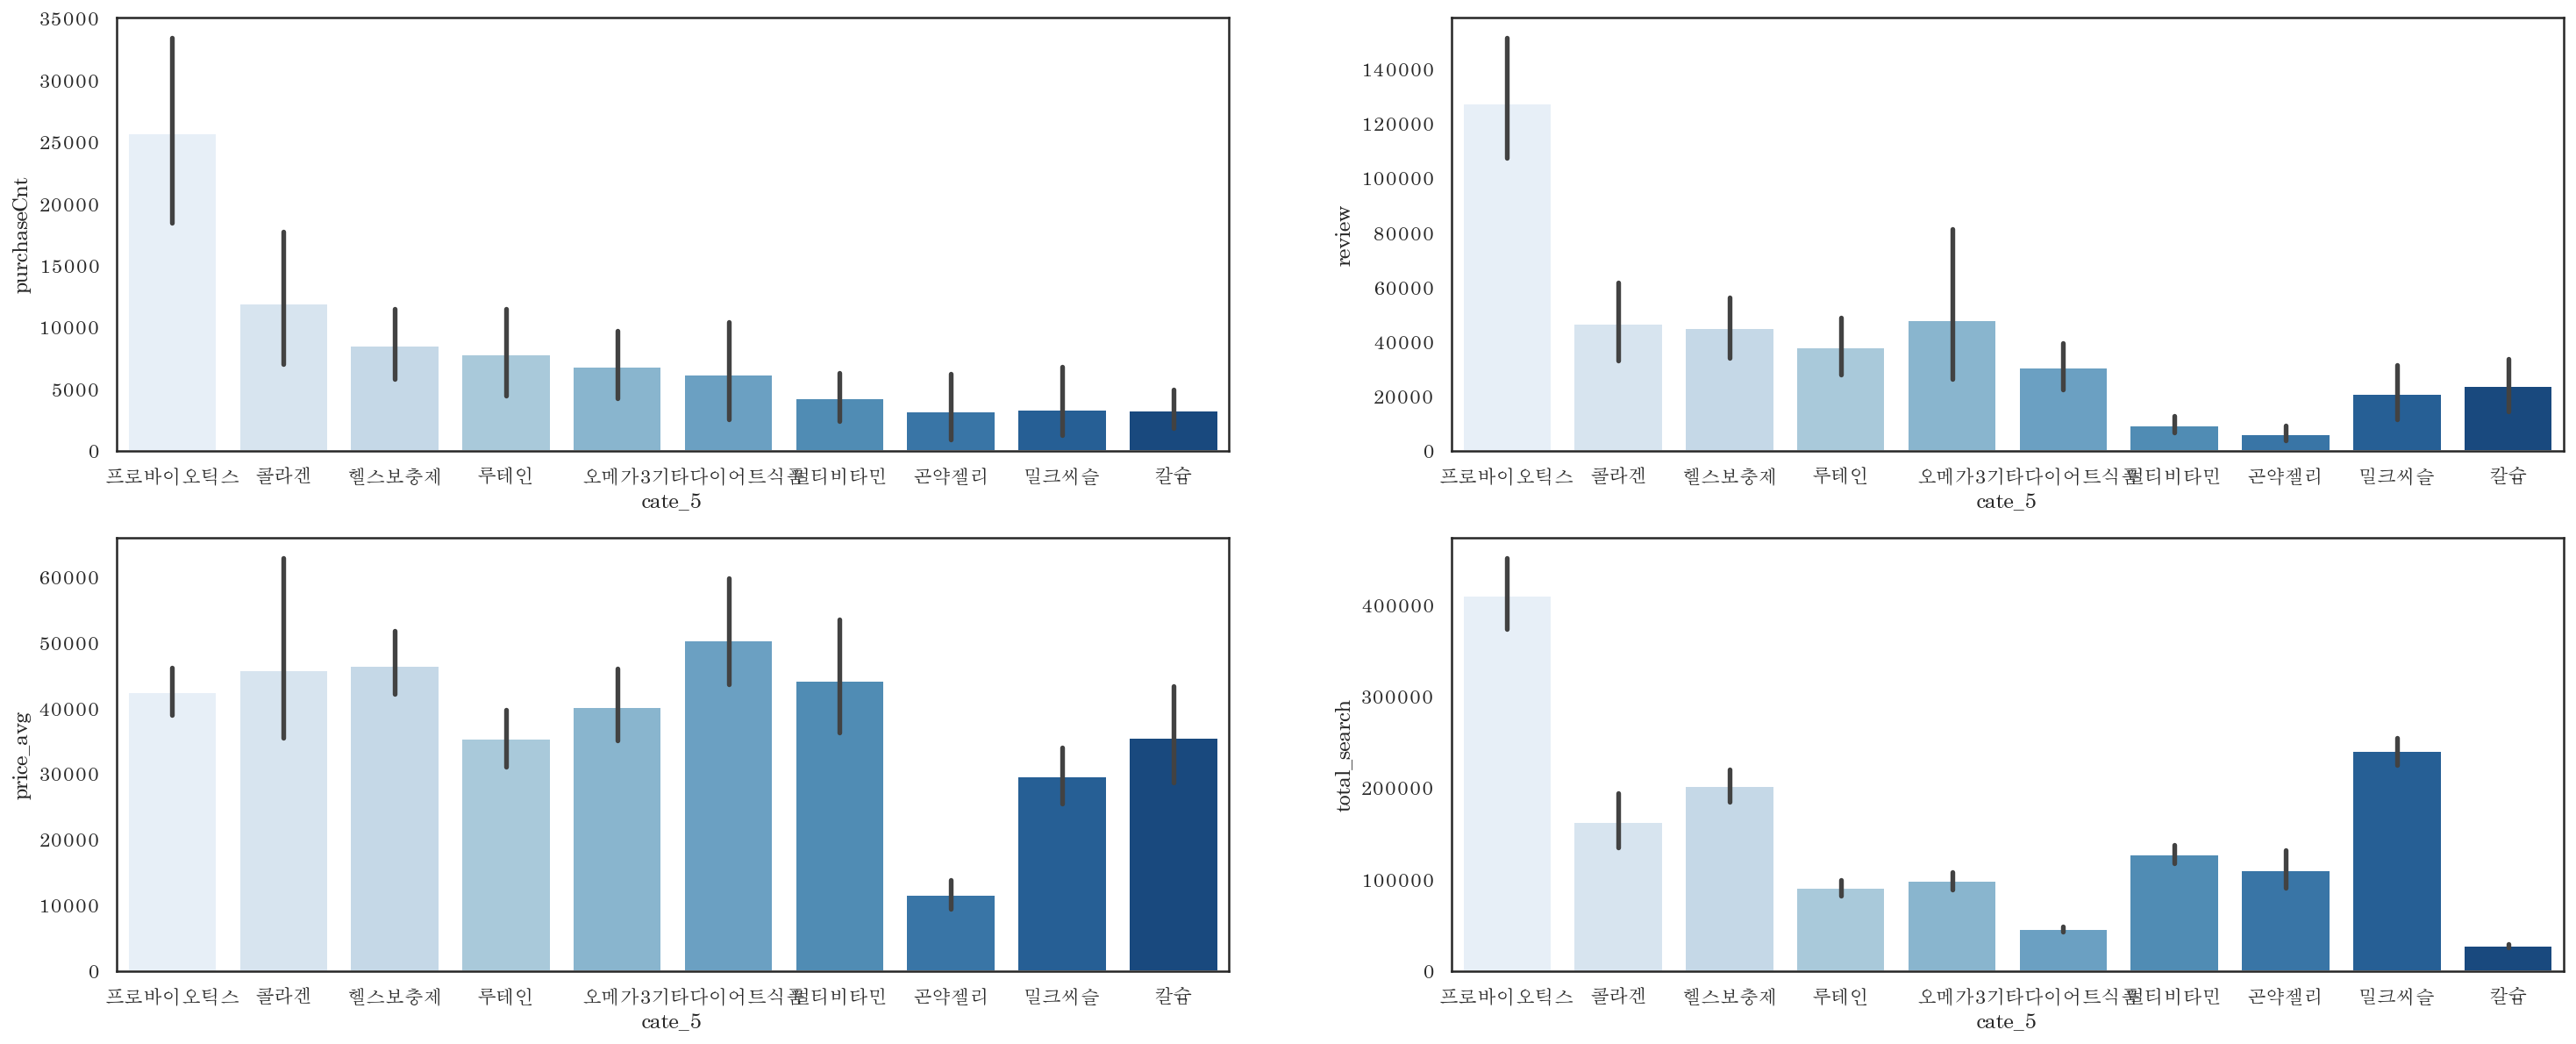

In [27]:
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.barplot(data=top10, x="cate_5", y="purchaseCnt", palette='Blues')
plt.subplot(222)
sns.barplot(data=top10, x="cate_5", y="review", palette='Blues')
plt.subplot(223)
sns.barplot(data=top10, x="cate_5", y="price_avg", palette='Blues')
plt.subplot(224)
sns.barplot(data=top10, x="cate_5", y="total_search", palette='Blues')

plt.show()

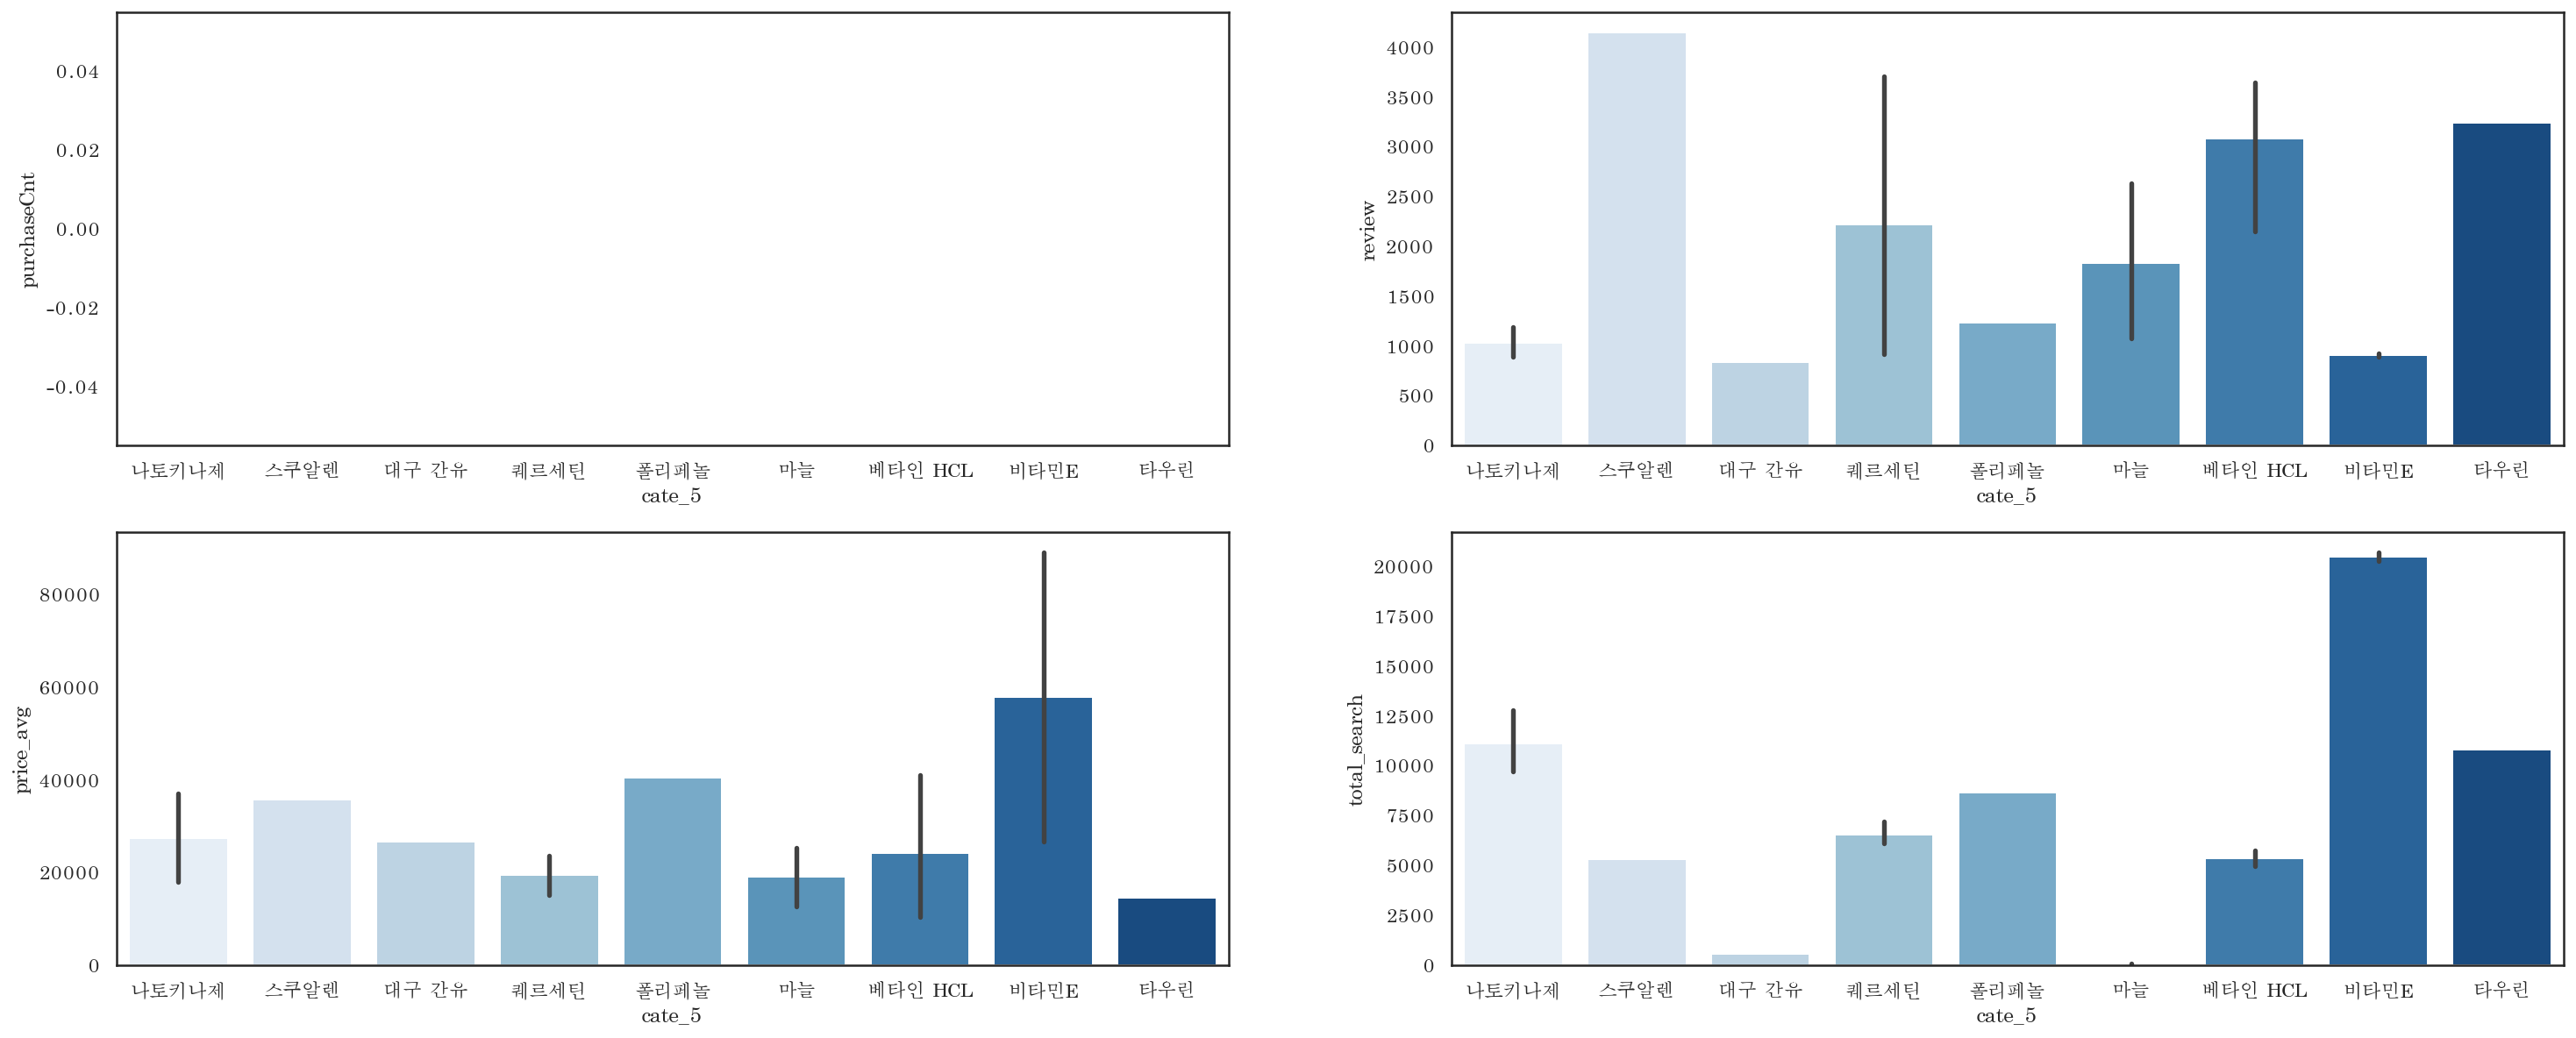

In [28]:
plt.figure(figsize=(25,10))
plt.subplot(221)
sns.barplot(data=bottom10, x="cate_5", y="purchaseCnt", palette='Blues')
plt.subplot(222)
sns.barplot(data=bottom10, x="cate_5", y="review", palette='Blues')
plt.subplot(223)
sns.barplot(data=bottom10, x="cate_5", y="price_avg", palette='Blues')
plt.subplot(224)
sns.barplot(data=bottom10, x="cate_5", y="total_search", palette='Blues')

plt.show()